# agent auto-*apprenant*

 extracte his features

Episode 1/100 | Reward: -79.317 | Eps: 0.99
Episode 2/100 | Reward: 0.748 | Eps: 0.99
Episode 3/100 | Reward: 0.927 | Eps: 0.99
Episode 4/100 | Reward: -249.213 | Eps: 0.98
Episode 5/100 | Reward: -158.200 | Eps: 0.98
Episode 6/100 | Reward: -61.231 | Eps: 0.97
Episode 7/100 | Reward: -28.783 | Eps: 0.97
Episode 8/100 | Reward: -267.846 | Eps: 0.96
Episode 9/100 | Reward: -39.394 | Eps: 0.96
Episode 10/100 | Reward: -17.877 | Eps: 0.95
Episode 11/100 | Reward: 0.100 | Eps: 0.95
Episode 12/100 | Reward: -255.274 | Eps: 0.94
Episode 13/100 | Reward: -65.533 | Eps: 0.94
Episode 14/100 | Reward: 1.000 | Eps: 0.93
Episode 15/100 | Reward: 0.200 | Eps: 0.93
Episode 16/100 | Reward: -43.833 | Eps: 0.92
Episode 17/100 | Reward: -130.679 | Eps: 0.92
Episode 18/100 | Reward: -54.665 | Eps: 0.91
Episode 19/100 | Reward: -7.524 | Eps: 0.91
Episode 20/100 | Reward: -11.106 | Eps: 0.90
Episode 21/100 | Reward: -157.411 | Eps: 0.90
Episode 22/100 | Reward: -214.248 | Eps: 0.90
Episode 23/100 | Reward

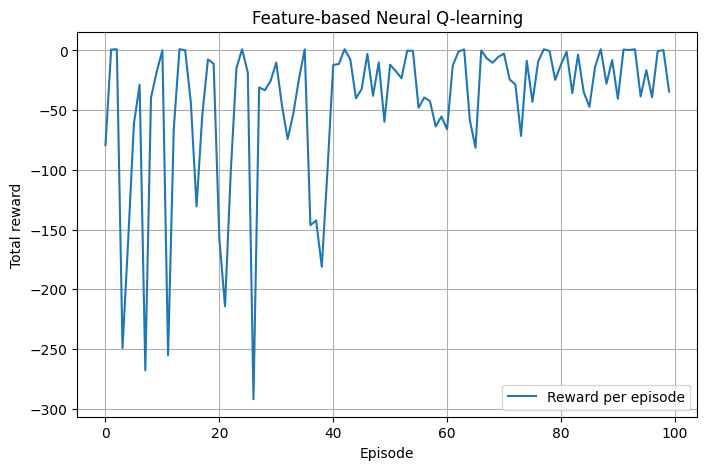

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import random

# ===============================
# 1️⃣ ENVIRONNEMENT SIMPLE
# ===============================
class SimpleEnv:
    def __init__(self):
        self.actions = [0, 1]  # 0: move left, 1: move right
        self.reset()

    def reset(self):
        self.pos = np.random.uniform(-1, 1)  # position aléatoire
        self.goal = 0.8  # position du but
        return np.array([self.pos, abs(self.goal - self.pos)], dtype=np.float32)

    def step(self, action):
        if action == 0:
            self.pos -= 0.1
        else:
            self.pos += 0.1

        self.pos = np.clip(self.pos, -1, 1)
        dist = abs(self.goal - self.pos)
        reward = 1.0 if dist < 0.05 else -dist  # plus on s'approche, mieux c’est
        done = dist < 0.05

        return np.array([self.pos, dist], dtype=np.float32), reward, done

# ===============================
# 2️⃣ RESEAU Q(s,a) AVEC FEATURES LATENTES
# ===============================
class FeatureQNet(nn.Module):
    def __init__(self, input_dim, feature_dim, output_dim):
        super().__init__()
        self.feature_extractor = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, feature_dim),
            nn.ReLU()
        )
        self.q_head = nn.Sequential(
            nn.Linear(feature_dim, 32),
            nn.ReLU(),
            nn.Linear(32, output_dim)
        )

    def forward(self, x):
        features = self.feature_extractor(x)
        q_values = self.q_head(features)
        return q_values, features

# ===============================
# 3️⃣ ENTRAINEMENT (Neural Q-learning)
# ===============================
def train_feature_qlearning(env, episodes=500, gamma=0.9, lr=0.01,
                            epsilon_start=1.0, epsilon_end=0.05, epsilon_decay=0.995):

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    q_net = FeatureQNet(input_dim=2, feature_dim=8, output_dim=len(env.actions)).to(device)
    optimizer = optim.Adam(q_net.parameters(), lr=lr)
    loss_fn = nn.MSELoss()

    epsilon = epsilon_start
    rewards_per_episode = []

    for ep in range(episodes):
        state = env.reset()
        done = False
        total_reward = 0

        while not done:
            # ε-greedy policy
            if random.random() < epsilon:
                action = random.randint(0, len(env.actions)-1)
            else:
                with torch.no_grad():
                    q_values, _ = q_net(torch.tensor(state, device=device))
                    action = torch.argmax(q_values).item()

            next_state, reward, done = env.step(action)
            total_reward += reward

            # Q-learning TD target
            with torch.no_grad():
                next_q, _ = q_net(torch.tensor(next_state, device=device))
                target = reward + gamma * torch.max(next_q) * (1 - int(done))

            q_values, _ = q_net(torch.tensor(state, device=device))
            q_value = q_values[action]

            loss = loss_fn(q_value, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            state = next_state

        epsilon = max(epsilon_end, epsilon * epsilon_decay)
        rewards_per_episode.append(total_reward)
        print(f"Episode {ep+1}/{episodes} | Reward: {total_reward:.3f} | Eps: {epsilon:.2f}")

    # Courbe d'apprentissage
    plt.figure(figsize=(8,5))
    plt.plot(rewards_per_episode, label="Reward per episode")
    plt.xlabel("Episode")
    plt.ylabel("Total reward")
    plt.title("Feature-based Neural Q-learning")
    plt.legend()
    plt.grid(True)
    plt.show()

    return q_net

# ===============================
# 4️⃣ LANCEMENT
# ===============================
env = SimpleEnv()
q_net = train_feature_qlearning(env, episodes=100)


Episode 1/400 | Reward: -733.444 | Eps: 0.99
Episode 2/400 | Reward: -26.700 | Eps: 0.99
Episode 3/400 | Reward: -26.662 | Eps: 0.99
Episode 4/400 | Reward: -0.787 | Eps: 0.98
Episode 5/400 | Reward: -5.266 | Eps: 0.98
Episode 6/400 | Reward: -11.937 | Eps: 0.97
Episode 7/400 | Reward: -13.007 | Eps: 0.97
Episode 8/400 | Reward: -13.198 | Eps: 0.96
Episode 9/400 | Reward: -0.832 | Eps: 0.96
Episode 10/400 | Reward: -257.581 | Eps: 0.95
Episode 11/400 | Reward: -338.237 | Eps: 0.95
Episode 12/400 | Reward: -8.097 | Eps: 0.94
Episode 13/400 | Reward: -19.237 | Eps: 0.94
Episode 14/400 | Reward: -40.925 | Eps: 0.93
Episode 15/400 | Reward: -164.100 | Eps: 0.93
Episode 16/400 | Reward: -261.193 | Eps: 0.92
Episode 17/400 | Reward: -46.755 | Eps: 0.92
Episode 18/400 | Reward: -79.084 | Eps: 0.91
Episode 19/400 | Reward: -0.200 | Eps: 0.91
Episode 20/400 | Reward: -30.593 | Eps: 0.90
Episode 21/400 | Reward: -34.933 | Eps: 0.90
Episode 22/400 | Reward: -64.368 | Eps: 0.90
Episode 23/400 | Re

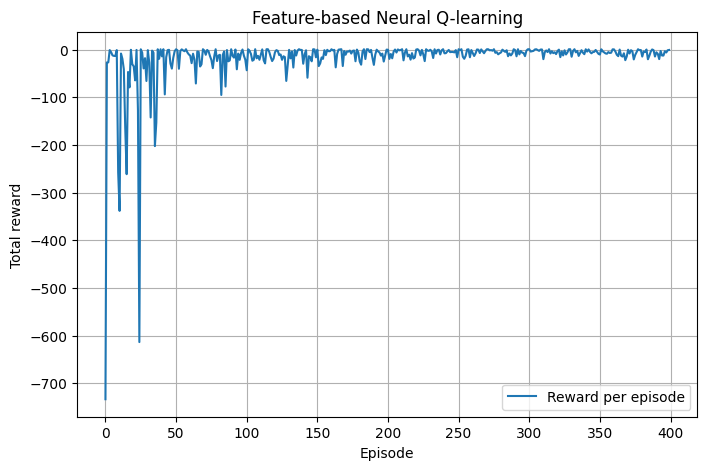

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import random

# ===============================
# 1️⃣ ENVIRONNEMENT SIMPLE
# ===============================
class SimpleEnv:
    def __init__(self):
        self.actions = [0, 1]  # 0: move left, 1: move right
        self.reset()

    def reset(self):
        self.pos = np.random.uniform(-1, 1)  # position aléatoire
        self.goal = 0.8  # position du but
        return np.array([self.pos, abs(self.goal - self.pos)], dtype=np.float32)

    def step(self, action):
        if action == 0:
            self.pos -= 0.1
        else:
            self.pos += 0.1

        self.pos = np.clip(self.pos, -1, 1)
        dist = abs(self.goal - self.pos)
        reward = 1.0 if dist < 0.05 else -dist  # plus on s'approche, mieux c’est
        done = dist < 0.05

        return np.array([self.pos, dist], dtype=np.float32), reward, done

# ===============================
# 2️⃣ RESEAU Q(s,a) AVEC FEATURES LATENTES
# ===============================
class FeatureQNet(nn.Module):
    def __init__(self, input_dim, feature_dim, output_dim):
        super().__init__()
        self.feature_extractor = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, feature_dim),
            nn.ReLU()
        )
        self.q_head = nn.Sequential(
            nn.Linear(feature_dim, 32),
            nn.ReLU(),
            nn.Linear(32, output_dim)
        )

    def forward(self, x):
        features = self.feature_extractor(x)
        q_values = self.q_head(features)
        return q_values, features

# ===============================
# 3️⃣ ENTRAINEMENT (Neural Q-learning)
# ===============================
def train_feature_qlearning(env, episodes=500, gamma=0.9, lr=0.01,
                            epsilon_start=1.0, epsilon_end=0.05, epsilon_decay=0.995):

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    q_net = FeatureQNet(input_dim=2, feature_dim=8, output_dim=len(env.actions)).to(device)
    optimizer = optim.Adam(q_net.parameters(), lr=lr)
    loss_fn = nn.MSELoss()

    epsilon = epsilon_start
    rewards_per_episode = []

    for ep in range(episodes):
        state = env.reset()
        done = False
        total_reward = 0

        while not done:
            # ε-greedy policy
            if random.random() < epsilon:
                action = random.randint(0, len(env.actions)-1)
            else:
                with torch.no_grad():
                    q_values, _ = q_net(torch.tensor(state, device=device))
                    action = torch.argmax(q_values).item()

            next_state, reward, done = env.step(action)
            total_reward += reward

            # Q-learning TD target
            with torch.no_grad():
                next_q, _ = q_net(torch.tensor(next_state, device=device))
                target = reward + gamma * torch.max(next_q) * (1 - int(done))

            q_values, _ = q_net(torch.tensor(state, device=device))
            q_value = q_values[action]

            loss = loss_fn(q_value, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            state = next_state

        epsilon = max(epsilon_end, epsilon * epsilon_decay)
        rewards_per_episode.append(total_reward)
        print(f"Episode {ep+1}/{episodes} | Reward: {total_reward:.3f} | Eps: {epsilon:.2f}")

    # Courbe d'apprentissage
    plt.figure(figsize=(8,5))
    plt.plot(rewards_per_episode, label="Reward per episode")
    plt.xlabel("Episode")
    plt.ylabel("Total reward")
    plt.title("Feature-based Neural Q-learning")
    plt.legend()
    plt.grid(True)
    plt.show()

    return q_net

# ===============================
# 4️⃣ LANCEMENT
# ===============================
env = SimpleEnv()
q_net = train_feature_qlearning(env, episodes=400)


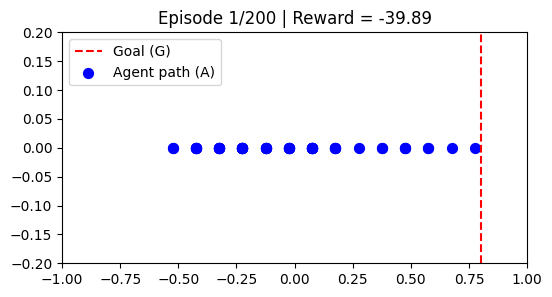

Episode 1/200 | Reward: -39.891 | Eps: 0.99
Episode 2/200 | Reward: -168.566 | Eps: 0.99
Episode 3/200 | Reward: -3.515 | Eps: 0.99
Episode 4/200 | Reward: -3.761 | Eps: 0.98
Episode 5/200 | Reward: -0.150 | Eps: 0.98
Episode 6/200 | Reward: 0.892 | Eps: 0.97
Episode 7/200 | Reward: -14.185 | Eps: 0.97
Episode 8/200 | Reward: -349.390 | Eps: 0.96
Episode 9/200 | Reward: -0.800 | Eps: 0.96
Episode 10/200 | Reward: -369.397 | Eps: 0.95
Episode 11/200 | Reward: -120.498 | Eps: 0.95
Episode 12/200 | Reward: -171.979 | Eps: 0.94
Episode 13/200 | Reward: -15.505 | Eps: 0.94
Episode 14/200 | Reward: 0.936 | Eps: 0.93
Episode 15/200 | Reward: -93.855 | Eps: 0.93
Episode 16/200 | Reward: -31.992 | Eps: 0.92
Episode 17/200 | Reward: -3.931 | Eps: 0.92
Episode 18/200 | Reward: -148.546 | Eps: 0.91
Episode 19/200 | Reward: -86.180 | Eps: 0.91
Episode 20/200 | Reward: 0.427 | Eps: 0.90
Episode 21/200 | Reward: -302.046 | Eps: 0.90
Episode 22/200 | Reward: -167.184 | Eps: 0.90
Episode 23/200 | Rewar

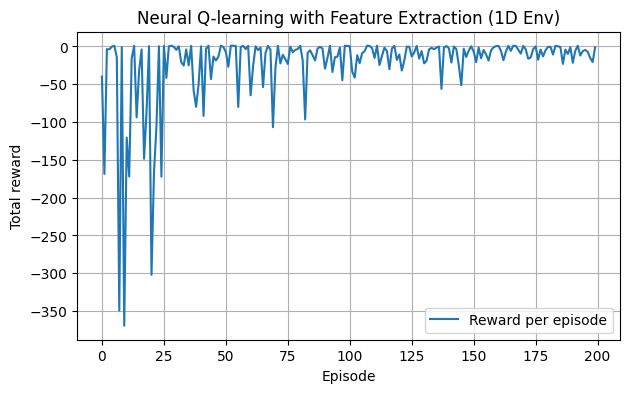

In [3]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import random
import time

# ===============================
# 1️⃣ ENVIRONNEMENT 1D SIMPLE
# ===============================
class SimpleEnv:
    def __init__(self):
        self.actions = [0, 1]  # 0 = left, 1 = right
        self.reset()

    def reset(self):
        self.pos = np.random.uniform(-1, 1)
        self.goal = 0.8
        return np.array([self.pos, abs(self.goal - self.pos)], dtype=np.float32)

    def step(self, action):
        if action == 0:
            self.pos -= 0.1
        else:
            self.pos += 0.1
        self.pos = np.clip(self.pos, -1, 1)

        dist = abs(self.goal - self.pos)
        reward = 1.0 if dist < 0.05 else -dist
        done = dist < 0.05

        return np.array([self.pos, dist], dtype=np.float32), reward, done


# ===============================
# 2️⃣ RÉSEAU NEURONAL Q(s, a)
# ===============================
class FeatureQNet(nn.Module):
    def __init__(self, input_dim=2, feature_dim=8, output_dim=2):
        super().__init__()
        self.feature_extractor = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, feature_dim),
            nn.ReLU()
        )
        self.q_head = nn.Sequential(
            nn.Linear(feature_dim, 32),
            nn.ReLU(),
            nn.Linear(32, output_dim)
        )

    def forward(self, x):
        features = self.feature_extractor(x)
        q_values = self.q_head(features)
        return q_values, features


# ===============================
# 3️⃣ APPRENTISSAGE AVEC VISUALISATION
# ===============================
def train_feature_qlearning(env, episodes=200, gamma=0.9, lr=0.01,
                            epsilon_start=1.0, epsilon_end=0.05, epsilon_decay=0.995,
                            visualize_every=10):

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    q_net = FeatureQNet().to(device)
    optimizer = optim.Adam(q_net.parameters(), lr=lr)
    loss_fn = nn.MSELoss()

    epsilon = epsilon_start
    rewards_per_episode = []

    plt.ion()
    fig, ax = plt.subplots(figsize=(6, 3))

    for ep in range(episodes):
        state = env.reset()
        done = False
        total_reward = 0
        positions = [env.pos]

        while not done:
            # ε-greedy
            if random.random() < epsilon:
                action = random.randint(0, len(env.actions) - 1)
            else:
                with torch.no_grad():
                    q_values, _ = q_net(torch.tensor(state, device=device))
                    action = torch.argmax(q_values).item()

            next_state, reward, done = env.step(action)
            total_reward += reward

            with torch.no_grad():
                next_q, _ = q_net(torch.tensor(next_state, device=device))
                target = reward + gamma * torch.max(next_q) * (1 - int(done))

            q_values, _ = q_net(torch.tensor(state, device=device))
            q_value = q_values[action]

            loss = loss_fn(q_value, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            state = next_state
            positions.append(env.pos)

        epsilon = max(epsilon_end, epsilon * epsilon_decay)
        rewards_per_episode.append(total_reward)

        # 🎨 Visualisation
        if ep % visualize_every == 0 or ep == episodes - 1:
            ax.clear()
            ax.set_xlim(-1, 1)
            ax.set_ylim(-0.2, 0.2)
            ax.axvline(env.goal, color='red', linestyle='--', label='Goal (G)')
            ax.scatter(positions, np.zeros_like(positions), color='blue', s=50, label='Agent path (A)')
            ax.set_title(f"Episode {ep+1}/{episodes} | Reward = {total_reward:.2f}")
            ax.legend()
            plt.pause(0.2)

        print(f"Episode {ep+1}/{episodes} | Reward: {total_reward:.3f} | Eps: {epsilon:.2f}")

    plt.ioff()
    plt.close(fig)

    # 📈 Courbe finale des récompenses
    plt.figure(figsize=(7, 4))
    plt.plot(rewards_per_episode, label="Reward per episode")
    plt.xlabel("Episode")
    plt.ylabel("Total reward")
    plt.title("Neural Q-learning with Feature Extraction (1D Env)")
    plt.legend()
    plt.grid(True)
    plt.show()

    return q_net


# ===============================
# 4️⃣ LANCEMENT
# ===============================
env = SimpleEnv()
q_net = train_feature_qlearning(env, episodes=200)


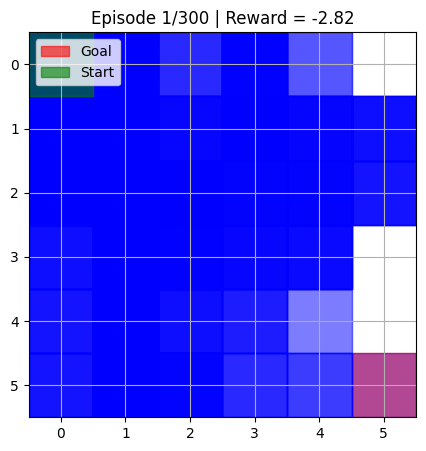

Episode 1/300 | Reward: -2.820 | Epsilon: 0.99
Episode 2/300 | Reward: -0.800 | Epsilon: 0.98
Episode 3/300 | Reward: -2.160 | Epsilon: 0.97
Episode 4/300 | Reward: -1.650 | Epsilon: 0.96
Episode 5/300 | Reward: 0.390 | Epsilon: 0.95
Episode 6/300 | Reward: 0.730 | Epsilon: 0.94
Episode 7/300 | Reward: -1.930 | Epsilon: 0.93
Episode 8/300 | Reward: -0.200 | Epsilon: 0.92
Episode 9/300 | Reward: 0.720 | Epsilon: 0.91
Episode 10/300 | Reward: -0.000 | Epsilon: 0.90
Episode 11/300 | Reward: 0.420 | Epsilon: 0.90
Episode 12/300 | Reward: -0.070 | Epsilon: 0.89
Episode 13/300 | Reward: 0.360 | Epsilon: 0.88
Episode 14/300 | Reward: 0.630 | Epsilon: 0.87
Episode 15/300 | Reward: 0.630 | Epsilon: 0.86
Episode 16/300 | Reward: -0.180 | Epsilon: 0.85
Episode 17/300 | Reward: 0.760 | Epsilon: 0.84
Episode 18/300 | Reward: 0.710 | Epsilon: 0.83
Episode 19/300 | Reward: 0.470 | Epsilon: 0.83
Episode 20/300 | Reward: 0.670 | Epsilon: 0.82
Episode 21/300 | Reward: 0.530 | Epsilon: 0.81
Episode 22/30

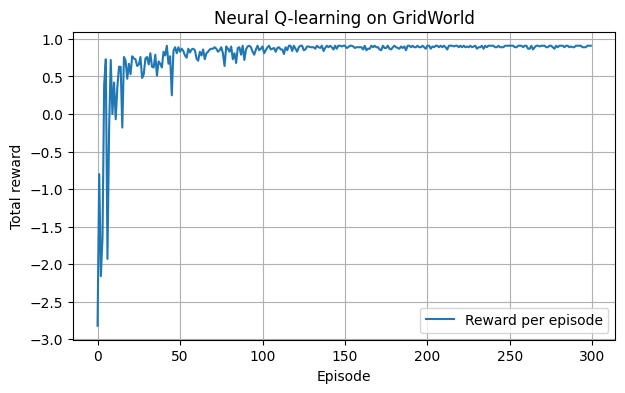

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import random
import time

# ===============================
# 1️⃣ ENVIRONNEMENT GRIDWORLD
# ===============================
class GridWorld:
    def __init__(self, size=(5, 5), start=(0, 0), goal=(4, 4)):
        self.rows, self.cols = size
        self.start = start
        self.goal = goal
        self.state = start
        self.actions = ['up', 'down', 'left', 'right']

    def reset(self):
        self.state = self.start
        return np.array(self.state, dtype=np.float32)

    def step(self, action):
        x, y = self.state
        if action == 'up':
            x = max(0, x - 1)
        elif action == 'down':
            x = min(self.rows - 1, x + 1)
        elif action == 'left':
            y = max(0, y - 1)
        elif action == 'right':
            y = min(self.cols - 1, y + 1)
        self.state = (x, y)

        reward = 1.0 if self.state == self.goal else -0.01
        done = self.state == self.goal
        return np.array(self.state, dtype=np.float32), reward, done


# ===============================
# 2️⃣ RESEAU NEURONAL Q(s,a)
# ===============================
class QNet(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=32, output_dim=4):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.net(x)


# ===============================
# 3️⃣ APPRENTISSAGE + VISUALISATION
# ===============================
def train_neural_q(env, episodes=200, alpha=0.001, gamma=0.9,
                   epsilon_start=1.0, epsilon_end=0.05, epsilon_decay=0.99,
                   visualize_every=10):

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    q_net = QNet().to(device)
    optimizer = optim.Adam(q_net.parameters(), lr=alpha)
    loss_fn = nn.MSELoss()

    epsilon = epsilon_start
    rewards_per_episode = []

    plt.ion()
    fig, ax = plt.subplots(figsize=(5, 5))

    for ep in range(episodes):
        state = env.reset()
        done = False
        total_reward = 0
        path = [env.state]

        while not done:
            # ε-greedy policy
            if random.random() < epsilon:
                action = random.choice(env.actions)
            else:
                with torch.no_grad():
                    q_values = q_net(torch.tensor(state, device=device))
                    action = env.actions[torch.argmax(q_values).item()]

            next_state, reward, done = env.step(action)
            total_reward += reward

            # Target Q-value
            with torch.no_grad():
                next_q = q_net(torch.tensor(next_state, device=device))
                target = reward + gamma * torch.max(next_q) * (1 - int(done))

            # Update Q(s,a)
            q_values = q_net(torch.tensor(state, device=device))
            action_idx = env.actions.index(action)
            q_value = q_values[action_idx]
            loss = loss_fn(q_value, target)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            state = next_state
            path.append(env.state)

        rewards_per_episode.append(total_reward)
        epsilon = max(epsilon_end, epsilon * epsilon_decay)

        # 🎨 Visualisation de l’épisode
        if ep % visualize_every == 0 or ep == episodes - 1:
            ax.clear()
            ax.set_xlim(-0.5, env.cols - 0.5)
            ax.set_ylim(-0.5, env.rows - 0.5)
            ax.set_xticks(range(env.cols))
            ax.set_yticks(range(env.rows))
            ax.grid(True)
            ax.invert_yaxis()

            # Goal
            gx, gy = env.goal
            ax.add_patch(plt.Rectangle((gy - 0.5, gx - 0.5), 1, 1, color='red', alpha=0.6, label='Goal'))

            # Path
            for (x, y) in path:
                ax.add_patch(plt.Rectangle((y - 0.5, x - 0.5), 1, 1, color='blue', alpha=0.3))

            # Start
            sx, sy = env.start
            ax.add_patch(plt.Rectangle((sy - 0.5, sx - 0.5), 1, 1, color='green', alpha=0.6, label='Start'))

            ax.set_title(f"Episode {ep + 1}/{episodes} | Reward = {total_reward:.2f}")
            ax.legend(loc='upper left')
            plt.pause(0.3)

        print(f"Episode {ep + 1}/{episodes} | Reward: {total_reward:.3f} | Epsilon: {epsilon:.2f}")

    plt.ioff()
    plt.close(fig)

    # Courbe de récompenses
    plt.figure(figsize=(7, 4))
    plt.plot(rewards_per_episode, label="Reward per episode")
    plt.xlabel("Episode")
    plt.ylabel("Total reward")
    plt.title("Neural Q-learning on GridWorld")
    plt.legend()
    plt.grid(True)
    plt.show()

    return q_net


# ===============================
# 4️⃣ EXECUTION
# ===============================
env = GridWorld(size=(6, 6), start=(0, 0), goal=(5, 5))
q_net = train_neural_q(env, episodes=300)


Episode 100/1000 | Total reward: 0.65 | ε=0.18
Episode 200/1000 | Total reward: 0.91 | ε=0.11
Episode 300/1000 | Total reward: 0.93 | ε=0.07
Episode 400/1000 | Total reward: 0.93 | ε=0.05
Episode 500/1000 | Total reward: 0.93 | ε=0.05
Episode 600/1000 | Total reward: 0.93 | ε=0.05
Episode 700/1000 | Total reward: 0.93 | ε=0.05
Episode 800/1000 | Total reward: -0.30 | ε=0.05
Episode 900/1000 | Total reward: -0.13 | ε=0.05
Episode 1000/1000 | Total reward: 0.05 | ε=0.05
✅ Training finished!


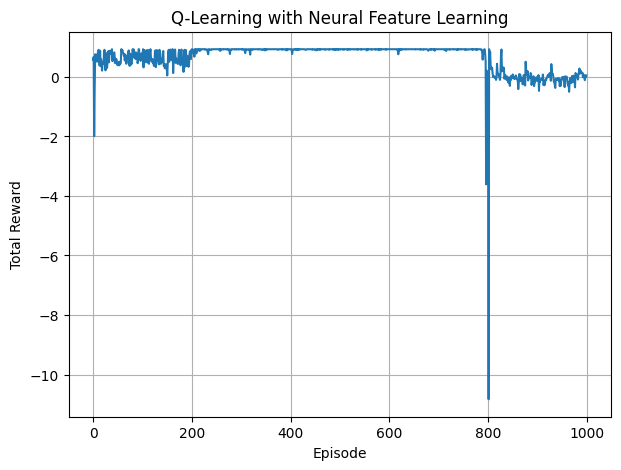


🎬 Testing learned policy...

A . . . .
. . . . .
. . . . .
. . . . .
. . . . G
--------------------
. . . . .
A . . . .
. . . . .
. . . . .
. . . . G
--------------------
. . . . .
. . . . .
A . . . .
. . . . .
. . . . G
--------------------
. . . . .
. . . . .
. . . . .
A . . . .
. . . . G
--------------------
. . . . .
. . . . .
. . . . .
. . . . .
A . . . G
--------------------
. . . . .
. . . . .
. . . . .
. . . . .
A . . . G
--------------------
. . . . .
. . . . .
. . . . .
. . . . .
A . . . G
--------------------
. . . . .
. . . . .
. . . . .
. . . . .
A . . . G
--------------------
. . . . .
. . . . .
. . . . .
. . . . .
A . . . G
--------------------
. . . . .
. . . . .
. . . . .
. . . . .
A . . . G
--------------------
. . . . .
. . . . .
. . . . .
. . . . .
A . . . G
--------------------
. . . . .
. . . . .
. . . . .
. . . . .
A . . . G
--------------------
. . . . .
. . . . .
. . . . .
. . . . .
A . . . G
--------------------
. . . . .
. . . . .
. . . . .
. . . . .
A . . .

In [5]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import random
import time

# =====================
#   Environment
# =====================
class GridWorld:
    def __init__(self, size=5, start=(0,0), goal=(4,4)):
        self.size = size
        self.start = start
        self.goal = goal
        self.actions = ['up', 'down', 'left', 'right']
        self.state = start

    def reset(self):
        self.state = self.start
        return np.array(self.state, dtype=np.float32)

    def step(self, action):
        x, y = self.state
        if action == 'up' and x > 0:
            x -= 1
        elif action == 'down' and x < self.size - 1:
            x += 1
        elif action == 'left' and y > 0:
            y -= 1
        elif action == 'right' and y < self.size - 1:
            y += 1
        self.state = (x, y)
        done = self.state == self.goal
        reward = 1.0 if done else -0.01
        return np.array(self.state, dtype=np.float32), reward, done

    def render(self):
        grid = np.zeros((self.size, self.size), dtype=str)
        grid[:] = '.'
        gx, gy = self.goal
        sx, sy = self.state
        grid[gx, gy] = 'G'
        grid[sx, sy] = 'A'
        print("\n".join([" ".join(row) for row in grid]))
        print('-'*20)
        time.sleep(0.2)


# =====================
#   Neural Q Approximator
# =====================
class QNetwork(nn.Module):
    def __init__(self, state_dim=2, action_dim=4):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(state_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, action_dim)
        )
    def forward(self, x):
        return self.net(x)


# =====================
#   Training setup
# =====================
env = GridWorld(size=5, start=(0,0), goal=(4,4))

qnet = QNetwork()
optimizer = optim.Adam(qnet.parameters(), lr=0.01)
criterion = nn.MSELoss()

episodes = 1000
gamma = 0.9
epsilon = 0.3
rewards_per_episode = []

for ep in range(episodes):
    state = env.reset() / (env.size - 1)  # normalize (x,y)
    done = False
    total_reward = 0

    while not done:
        # epsilon-greedy action
        if random.random() < epsilon:
            action_idx = random.randint(0, 3)
        else:
            with torch.no_grad():
                q_values = qnet(torch.tensor(state).float().unsqueeze(0))
                action_idx = q_values.argmax().item()

        next_state, reward, done = env.step(env.actions[action_idx])
        next_state = next_state / (env.size - 1)  # normalize
        total_reward += reward

        # Q-learning update
        q_values = qnet(torch.tensor(state).float().unsqueeze(0))
        next_q_values = qnet(torch.tensor(next_state).float().unsqueeze(0)).detach()

        target = q_values.clone()
        target[0, action_idx] = reward + gamma * torch.max(next_q_values) * (1 - int(done))

        loss = criterion(q_values, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        state = next_state

    epsilon = max(0.05, epsilon * 0.995)  # decay epsilon
    rewards_per_episode.append(total_reward)

    if (ep+1) % 100 == 0:
        print(f"Episode {ep+1}/{episodes} | Total reward: {total_reward:.2f} | ε={epsilon:.2f}")

print("✅ Training finished!")


# =====================
#   Plot learning curve
# =====================
plt.figure(figsize=(7,5))
plt.plot(rewards_per_episode)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Q-Learning with Neural Feature Learning")
plt.grid(True)
plt.show()


# =====================
#   Test Visualization
# =====================
state = env.reset() / (env.size - 1)
done = False
steps = 0

print("\n🎬 Testing learned policy...\n")
while not done and steps < 30:
    env.render()
    with torch.no_grad():
        q_values = qnet(torch.tensor(state).float().unsqueeze(0))
        action_idx = q_values.argmax().item()
    next_state, reward, done = env.step(env.actions[action_idx])
    state = next_state / (env.size - 1)
    steps += 1

env.render()
print("🎯 Goal reached!")


Episode 100/1000 | Total reward: 0.37 | ε=0.18
Episode 200/1000 | Total reward: 0.18 | ε=0.11
Episode 300/1000 | Total reward: 0.33 | ε=0.07
Episode 400/1000 | Total reward: -0.22 | ε=0.05
Episode 500/1000 | Total reward: 0.18 | ε=0.05
Episode 600/1000 | Total reward: -0.17 | ε=0.05
Episode 700/1000 | Total reward: 0.03 | ε=0.05
Episode 800/1000 | Total reward: -0.42 | ε=0.05
Episode 900/1000 | Total reward: -0.00 | ε=0.05
Episode 1000/1000 | Total reward: -0.30 | ε=0.05
✅ Training finished!


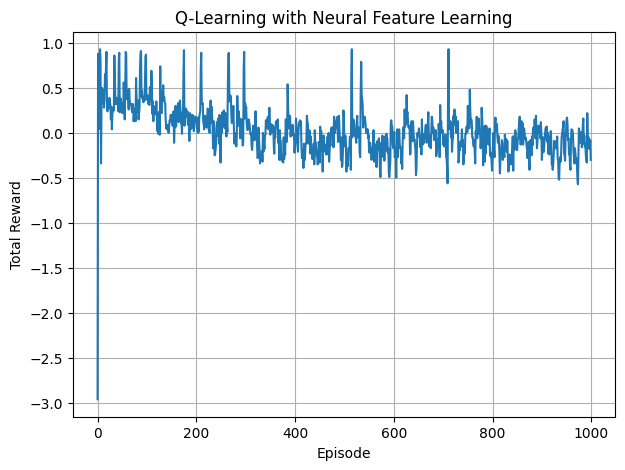


🎬 Visualizing learned policy...


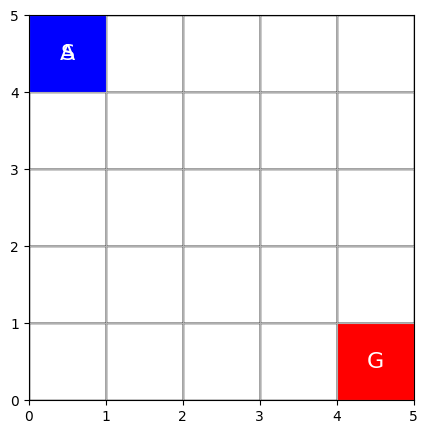

<Figure size 640x480 with 0 Axes>

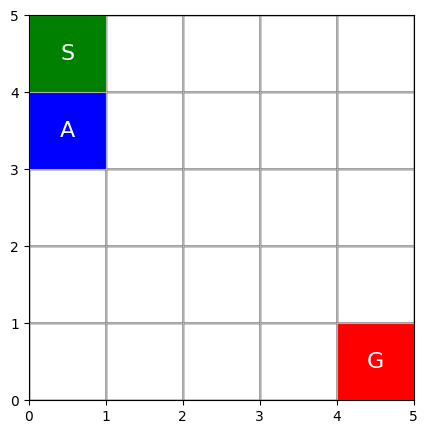

<Figure size 640x480 with 0 Axes>

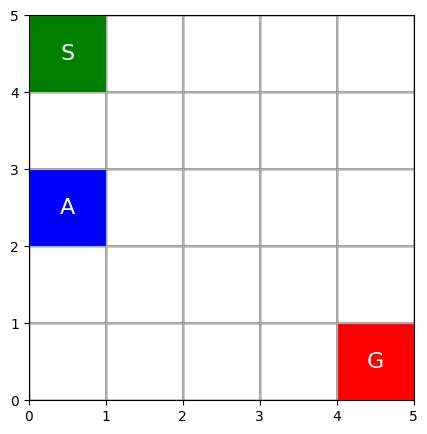

<Figure size 640x480 with 0 Axes>

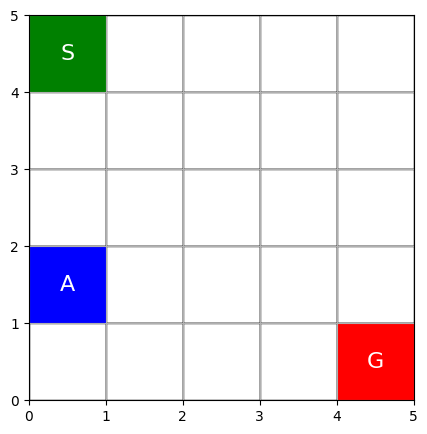

<Figure size 640x480 with 0 Axes>

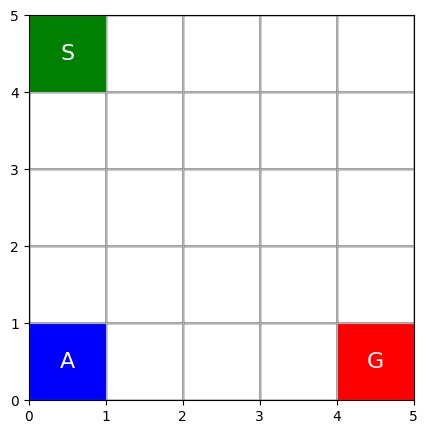

<Figure size 640x480 with 0 Axes>

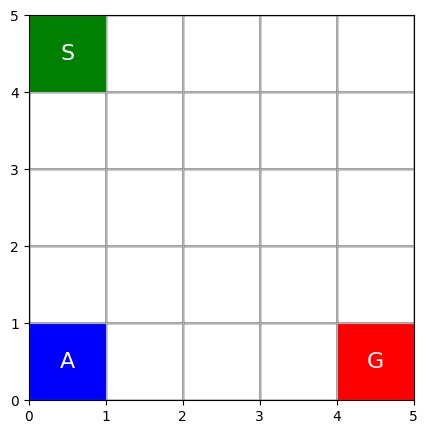

<Figure size 640x480 with 0 Axes>

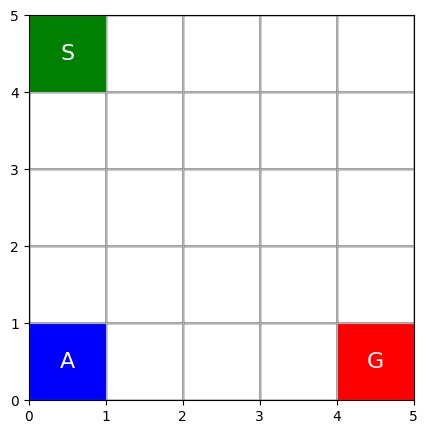

<Figure size 640x480 with 0 Axes>

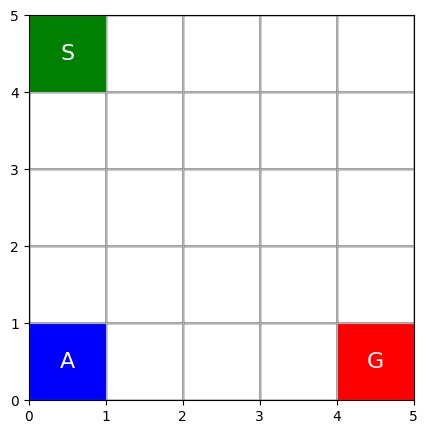

<Figure size 640x480 with 0 Axes>

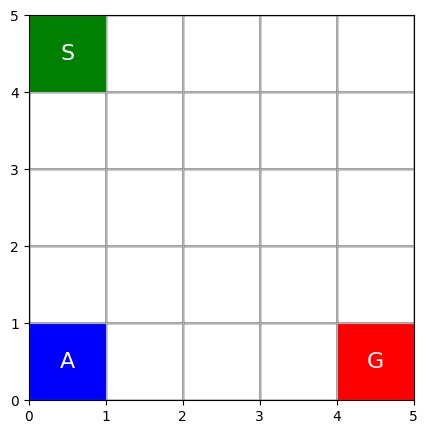

<Figure size 640x480 with 0 Axes>

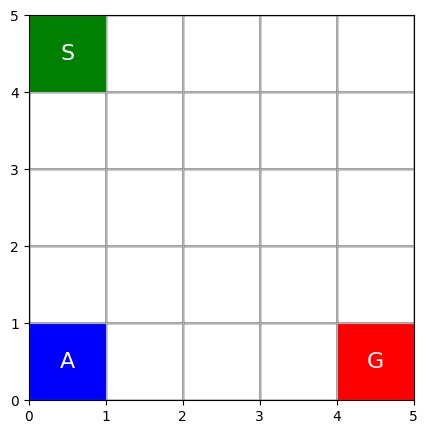

<Figure size 640x480 with 0 Axes>

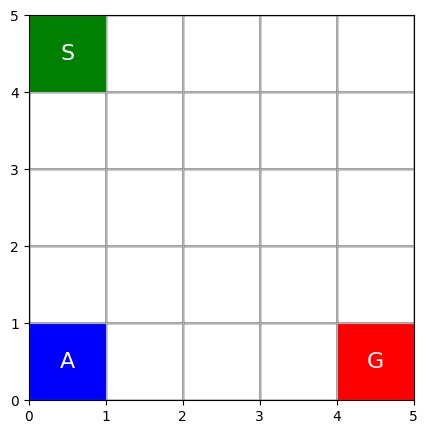

<Figure size 640x480 with 0 Axes>

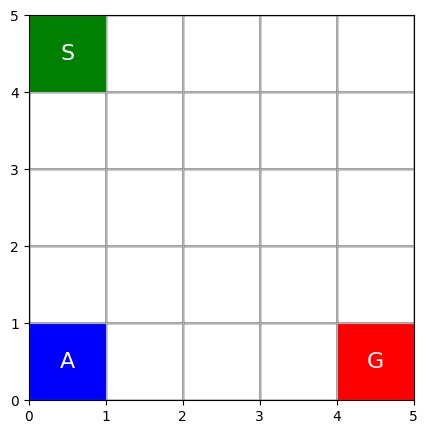

<Figure size 640x480 with 0 Axes>

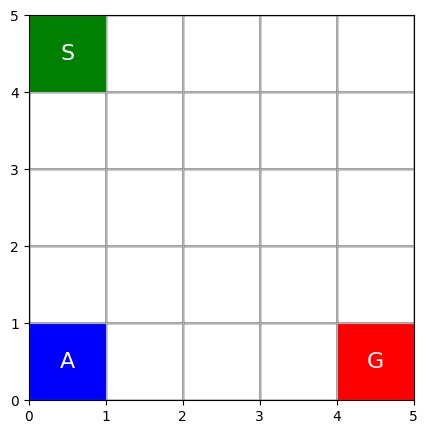

<Figure size 640x480 with 0 Axes>

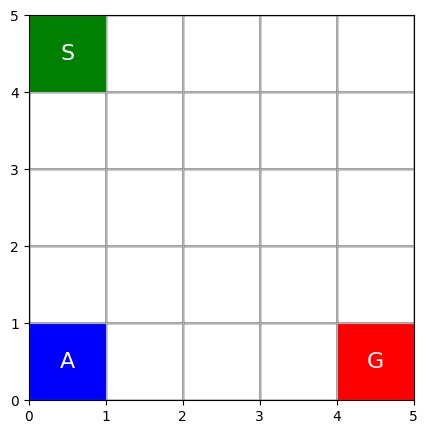

<Figure size 640x480 with 0 Axes>

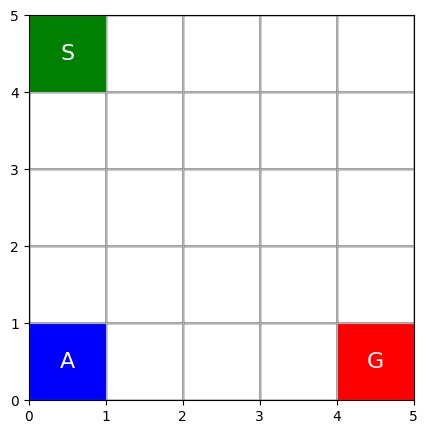

<Figure size 640x480 with 0 Axes>

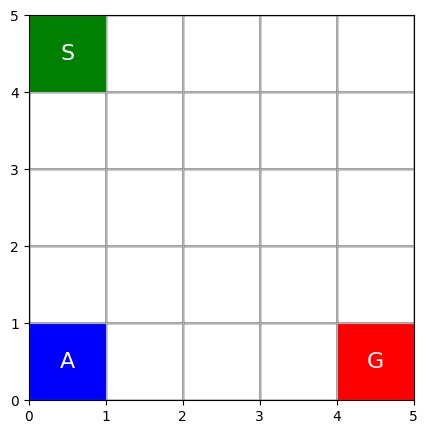

<Figure size 640x480 with 0 Axes>

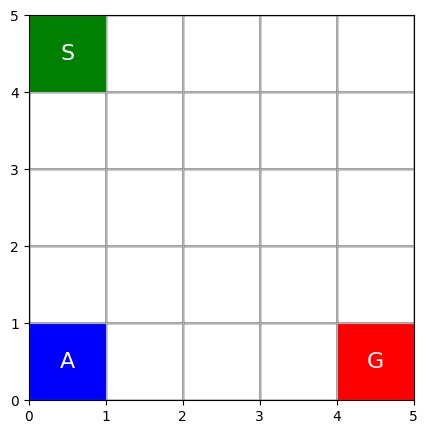

<Figure size 640x480 with 0 Axes>

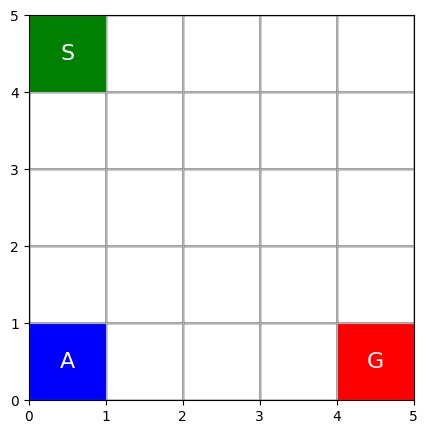

<Figure size 640x480 with 0 Axes>

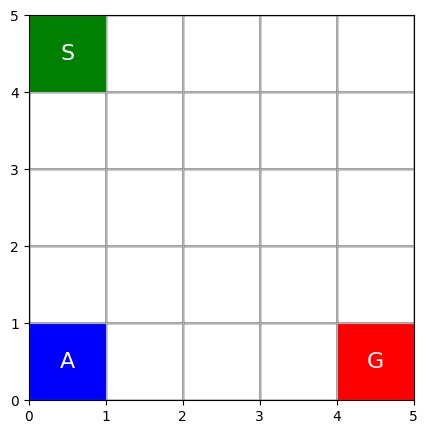

<Figure size 640x480 with 0 Axes>

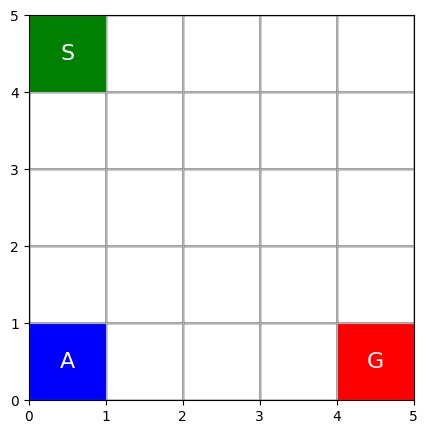

<Figure size 640x480 with 0 Axes>

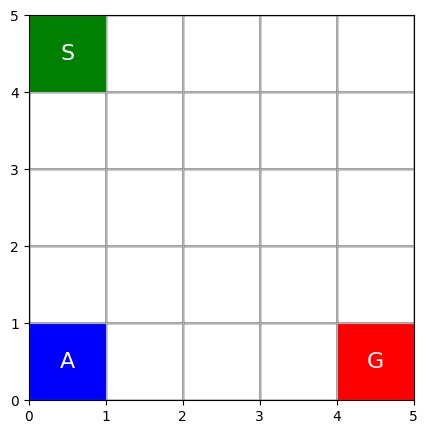

<Figure size 640x480 with 0 Axes>

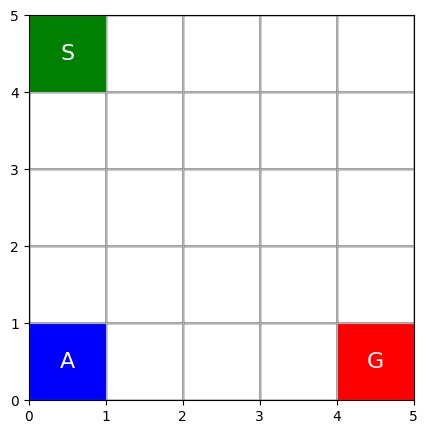

<Figure size 640x480 with 0 Axes>

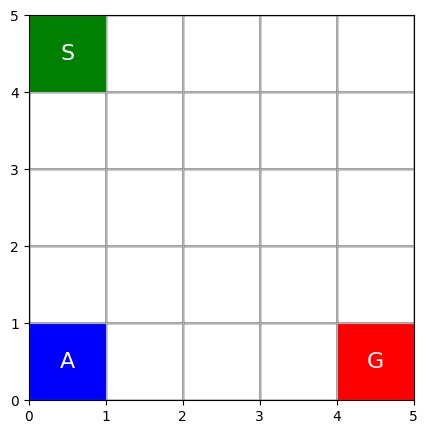

<Figure size 640x480 with 0 Axes>

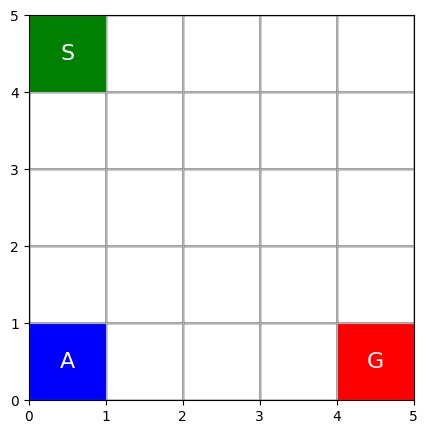

<Figure size 640x480 with 0 Axes>

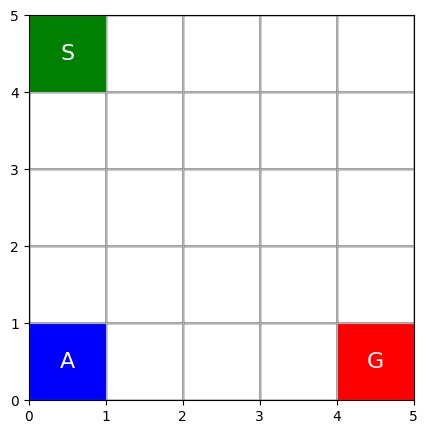

<Figure size 640x480 with 0 Axes>

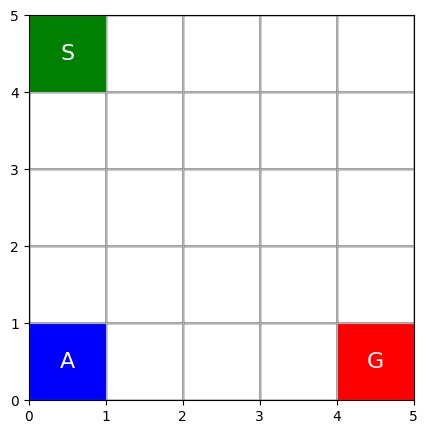

<Figure size 640x480 with 0 Axes>

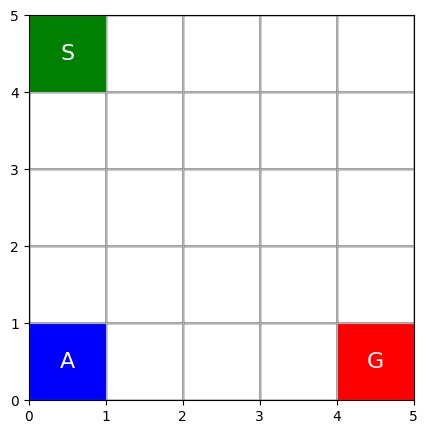

<Figure size 640x480 with 0 Axes>

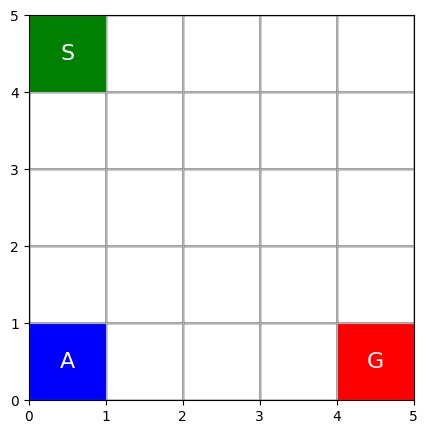

<Figure size 640x480 with 0 Axes>

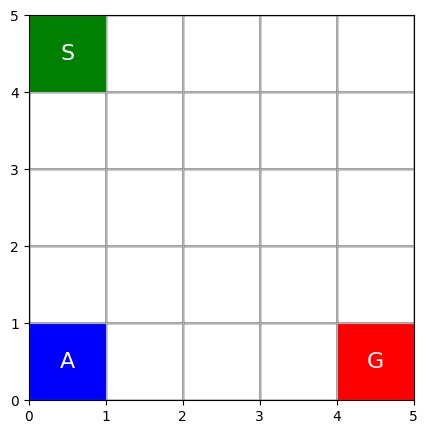

<Figure size 640x480 with 0 Axes>

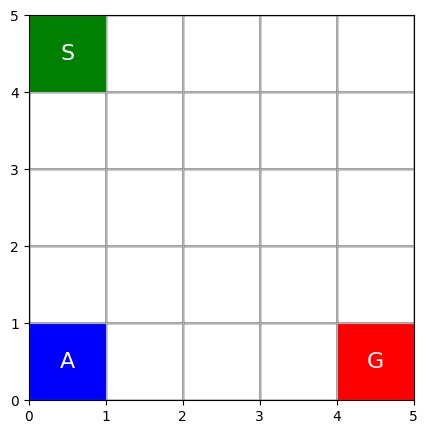

<Figure size 640x480 with 0 Axes>

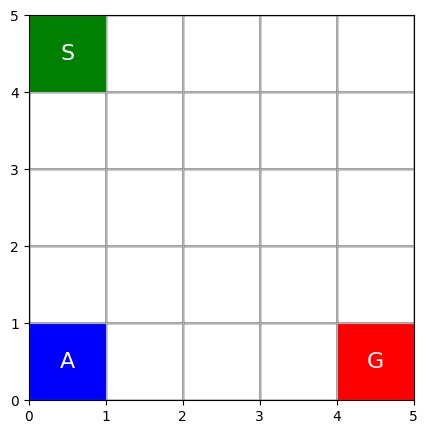

🎯 Goal reached!


In [6]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import time

# =====================
#   Environment (avec render matplotlib)
# =====================
class GridWorld:
    def __init__(self, size=5, start=(0,0), goal=(4,4)):
        self.size = size
        self.start = start
        self.goal = goal
        self.actions = ['up', 'down', 'left', 'right']
        self.state = start

    def reset(self):
        self.state = self.start
        return np.array(self.state, dtype=np.float32)

    def step(self, action):
        x, y = self.state
        if action == 'up' and x > 0:
            x -= 1
        elif action == 'down' and x < self.size - 1:
            x += 1
        elif action == 'left' and y > 0:
            y -= 1
        elif action == 'right' and y < self.size - 1:
            y += 1

        self.state = (x, y)
        done = self.state == self.goal
        reward = 1.0 if done else -0.01
        return np.array(self.state, dtype=np.float32), reward, done

    def render(self):
        fig, ax = plt.subplots(figsize=(5, 5))

        for i in range(self.size):
            for j in range(self.size):
                rect = patches.Rectangle((j, self.size - 1 - i), 1, 1,
                                         linewidth=1, edgecolor='black', facecolor='white')
                ax.add_patch(rect)

        # Goal
        gx, gy = self.goal
        ax.add_patch(patches.Rectangle((gy, self.size - 1 - gx), 1, 1, facecolor='red'))
        ax.text(gy + 0.5, self.size - 1 - gx + 0.5, 'G', ha='center', va='center', color='white', fontsize=16)

        # Start
        sx, sy = self.start
        ax.add_patch(patches.Rectangle((sy, self.size - 1 - sx), 1, 1, facecolor='green'))
        ax.text(sy + 0.5, self.size - 1 - sx + 0.5, 'S', ha='center', va='center', color='white', fontsize=16)

        # Agent
        ax.add_patch(patches.Rectangle((self.state[1], self.size - 1 - self.state[0]), 1, 1, facecolor='blue'))
        ax.text(self.state[1] + 0.5, self.size - 1 - self.state[0] + 0.5, 'A', ha='center', va='center', color='white', fontsize=16)

        ax.set_xlim(0, self.size)
        ax.set_ylim(0, self.size)
        ax.set_xticks(range(self.size + 1))
        ax.set_yticks(range(self.size + 1))
        ax.set_aspect('equal')
        plt.grid(True)
        plt.show(block=False)
        plt.pause(0.4)
        plt.clf()


# =====================
#   Neural Q Approximator
# =====================
class QNetwork(nn.Module):
    def __init__(self, state_dim=2, action_dim=4):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(state_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, action_dim)
        )
    def forward(self, x):
        return self.net(x)


# =====================
#   Training setup
# =====================
env = GridWorld(size=5, start=(0,0), goal=(4,4))
qnet = QNetwork()
optimizer = optim.Adam(qnet.parameters(), lr=0.01)
criterion = nn.MSELoss()

episodes = 1000
gamma = 0.9
epsilon = 0.3
rewards_per_episode = []

for ep in range(episodes):
    state = env.reset() / (env.size - 1)
    done = False
    total_reward = 0

    while not done:
        # epsilon-greedy action
        if random.random() < epsilon:
            action_idx = random.randint(0, 3)
        else:
            with torch.no_grad():
                q_values = qnet(torch.tensor(state).float().unsqueeze(0))
                action_idx = q_values.argmax().item()

        next_state, reward, done = env.step(env.actions[action_idx])
        next_state = next_state / (env.size - 1)
        total_reward += reward

        # Q-learning update
        q_values = qnet(torch.tensor(state).float().unsqueeze(0))
        next_q_values = qnet(torch.tensor(next_state).float().unsqueeze(0)).detach()
        target = q_values.clone()
        target[0, action_idx] = reward + gamma * torch.max(next_q_values) * (1 - int(done))

        loss = criterion(q_values, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        state = next_state

    epsilon = max(0.05, epsilon * 0.995)
    rewards_per_episode.append(total_reward)

    if (ep+1) % 100 == 0:
        print(f"Episode {ep+1}/{episodes} | Total reward: {total_reward:.2f} | ε={epsilon:.2f}")

print("✅ Training finished!")


# =====================
#   Plot learning curve
# =====================
plt.figure(figsize=(7,5))
plt.plot(rewards_per_episode)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Q-Learning with Neural Feature Learning")
plt.grid(True)
plt.show()


# =====================
#   Test Visualization
# =====================
state = env.reset() / (env.size - 1)
done = False
steps = 0

print("\n🎬 Visualizing learned policy...")
while not done and steps < 30:
    env.render()
    with torch.no_grad():
        q_values = qnet(torch.tensor(state).float().unsqueeze(0))
        action_idx = q_values.argmax().item()
    next_state, reward, done = env.step(env.actions[action_idx])
    state = next_state / (env.size - 1)
    steps += 1

env.render()
plt.close()
print("🎯 Goal reached!")


On va maintenant remplacer le Q-learning par un Actor-Critic simple, c’est-à-dire :

Un Critic qui apprend la valeur V(s) (pas Q(s,a)),

Un Actor qui apprend une politique π(a|s) (une distribution de probabilités sur les actions),

Et les deux sont entraînés ensemble à partir de la même observation (ici, la position (x, y)).

Episode 100/1000 | Total reward: 0.93
Episode 200/1000 | Total reward: 0.93
Episode 300/1000 | Total reward: 0.93
Episode 400/1000 | Total reward: 0.93
Episode 500/1000 | Total reward: 0.93
Episode 600/1000 | Total reward: 0.93
Episode 700/1000 | Total reward: 0.93
Episode 800/1000 | Total reward: 0.93
Episode 900/1000 | Total reward: 0.91
Episode 1000/1000 | Total reward: 0.93
✅ Training finished!


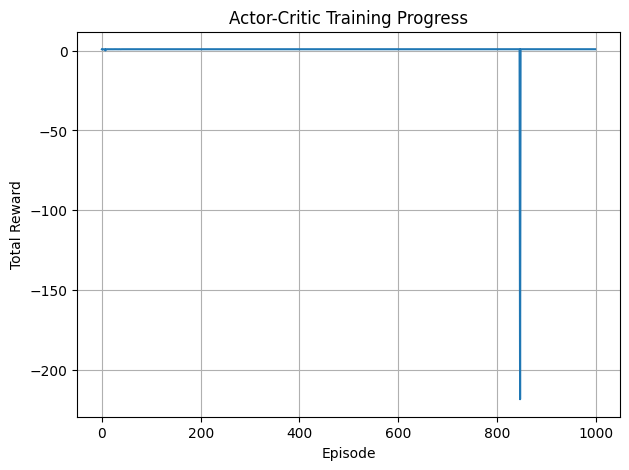


🎬 Visualizing learned policy...


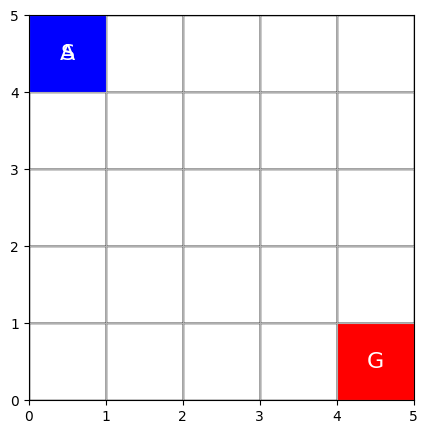

<Figure size 640x480 with 0 Axes>

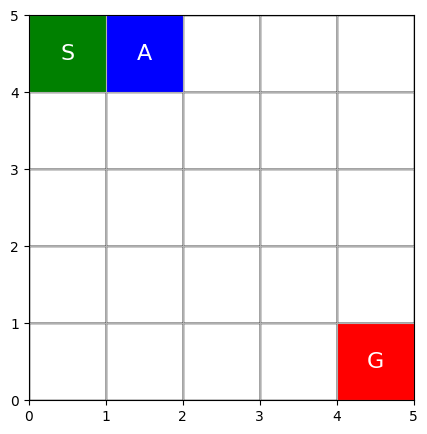

<Figure size 640x480 with 0 Axes>

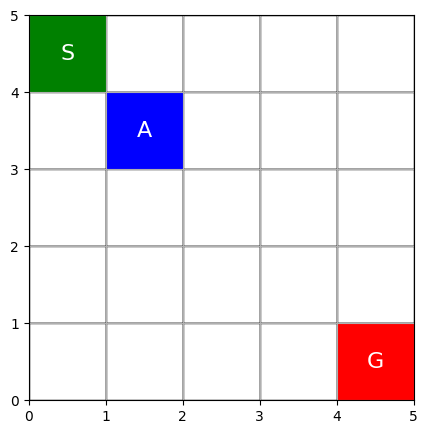

<Figure size 640x480 with 0 Axes>

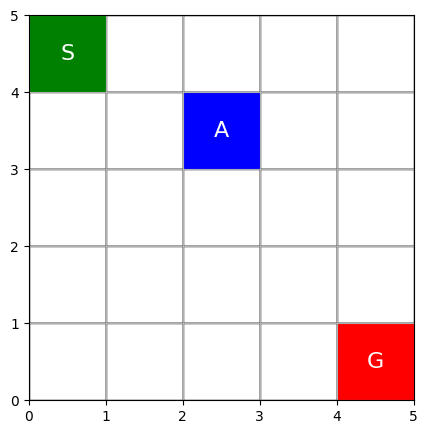

<Figure size 640x480 with 0 Axes>

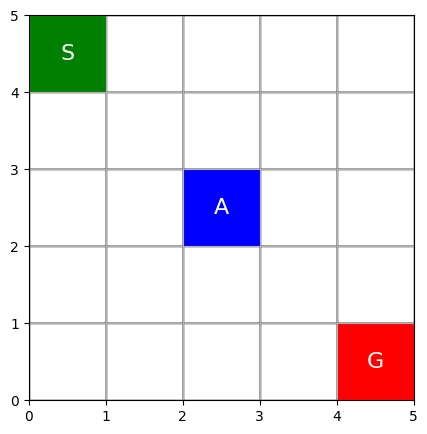

<Figure size 640x480 with 0 Axes>

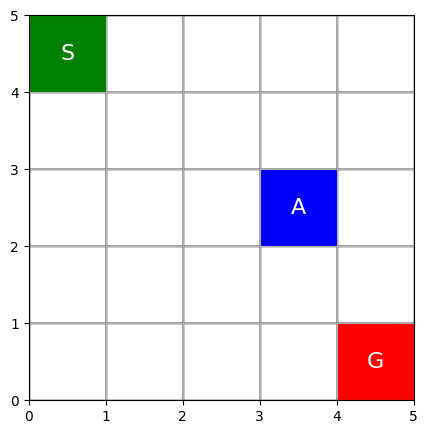

<Figure size 640x480 with 0 Axes>

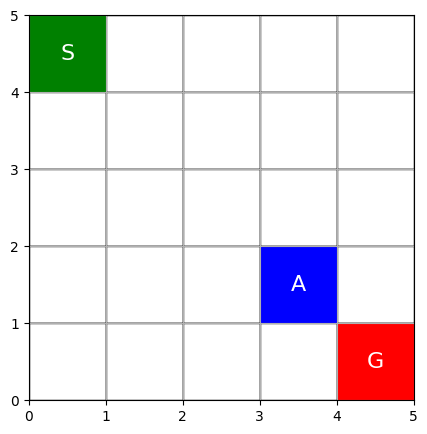

<Figure size 640x480 with 0 Axes>

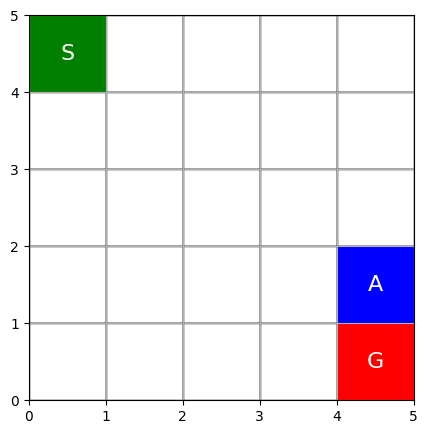

<Figure size 640x480 with 0 Axes>

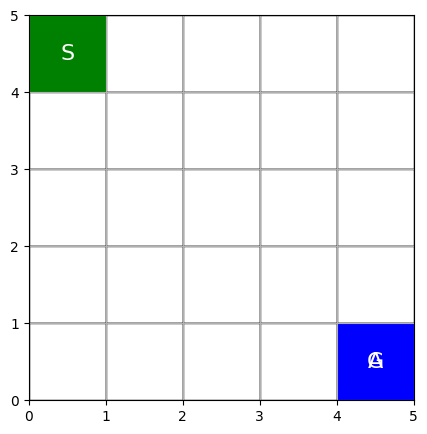

🎯 Goal reached!


In [7]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import time

# =====================
#   Environment
# =====================
class GridWorld:
    def __init__(self, size=5, start=(0,0), goal=(4,4)):
        self.size = size
        self.start = start
        self.goal = goal
        self.actions = ['up', 'down', 'left', 'right']
        self.state = start

    def reset(self):
        self.state = self.start
        return np.array(self.state, dtype=np.float32)

    def step(self, action):
        x, y = self.state
        if action == 'up' and x > 0:
            x -= 1
        elif action == 'down' and x < self.size - 1:
            x += 1
        elif action == 'left' and y > 0:
            y -= 1
        elif action == 'right' and y < self.size - 1:
            y += 1

        self.state = (x, y)
        done = self.state == self.goal
        reward = 1.0 if done else -0.01
        return np.array(self.state, dtype=np.float32), reward, done

    def render(self):
        fig, ax = plt.subplots(figsize=(5, 5))

        for i in range(self.size):
            for j in range(self.size):
                rect = patches.Rectangle((j, self.size - 1 - i), 1, 1,
                                         linewidth=1, edgecolor='black', facecolor='white')
                ax.add_patch(rect)

        # Goal
        gx, gy = self.goal
        ax.add_patch(patches.Rectangle((gy, self.size - 1 - gx), 1, 1, facecolor='red'))
        ax.text(gy + 0.5, self.size - 1 - gx + 0.5, 'G', ha='center', va='center', color='white', fontsize=16)

        # Start
        sx, sy = self.start
        ax.add_patch(patches.Rectangle((sy, self.size - 1 - sx), 1, 1, facecolor='green'))
        ax.text(sy + 0.5, self.size - 1 - sx + 0.5, 'S', ha='center', va='center', color='white', fontsize=16)

        # Agent
        ax.add_patch(patches.Rectangle((self.state[1], self.size - 1 - self.state[0]), 1, 1, facecolor='blue'))
        ax.text(self.state[1] + 0.5, self.size - 1 - self.state[0] + 0.5, 'A', ha='center', va='center', color='white', fontsize=16)

        ax.set_xlim(0, self.size)
        ax.set_ylim(0, self.size)
        ax.set_xticks(range(self.size + 1))
        ax.set_yticks(range(self.size + 1))
        ax.set_aspect('equal')
        plt.grid(True)
        plt.show(block=False)
        plt.pause(0.4)
        plt.clf()


# =====================
#   Actor-Critic Networks
# =====================
class Actor(nn.Module):
    def __init__(self, state_dim=2, action_dim=4):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(state_dim, 32),
            nn.ReLU(),
            nn.Linear(32, action_dim),
            nn.Softmax(dim=-1)
        )
    def forward(self, x):
        return self.net(x)


class Critic(nn.Module):
    def __init__(self, state_dim=2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(state_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
    def forward(self, x):
        return self.net(x)


# =====================
#   Training
# =====================
env = GridWorld(size=5, start=(0,0), goal=(4,4))

actor = Actor()
critic = Critic()
optimizerA = optim.Adam(actor.parameters(), lr=0.01)
optimizerC = optim.Adam(critic.parameters(), lr=0.01)
gamma = 0.9
episodes = 1000
rewards_per_episode = []

for ep in range(episodes):
    state = env.reset() / (env.size - 1)
    done = False
    total_reward = 0

    while not done:
        state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
        probs = actor(state_tensor)
        dist = torch.distributions.Categorical(probs)
        action = dist.sample()
        action_idx = action.item()

        next_state, reward, done = env.step(env.actions[action_idx])
        next_state = next_state / (env.size - 1)
        total_reward += reward

        # TD(0) update
        value = critic(state_tensor)
        next_value = critic(torch.tensor(next_state, dtype=torch.float32).unsqueeze(0)).detach()
        td_target = reward + gamma * next_value * (1 - int(done))
        td_error = td_target - value

        # Update Critic
        critic_loss = td_error.pow(2)
        optimizerC.zero_grad()
        critic_loss.backward()
        optimizerC.step()

        # Update Actor
        actor_loss = -dist.log_prob(action) * td_error.detach()
        optimizerA.zero_grad()
        actor_loss.backward()
        optimizerA.step()

        state = next_state

    rewards_per_episode.append(total_reward)

    if (ep+1) % 100 == 0:
        print(f"Episode {ep+1}/{episodes} | Total reward: {total_reward:.2f}")

print("✅ Training finished!")


# =====================
#   Plot training curve
# =====================
plt.figure(figsize=(7,5))
plt.plot(rewards_per_episode)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Actor-Critic Training Progress")
plt.grid(True)
plt.show()


# =====================
#   Test visualization
# =====================
state = env.reset() / (env.size - 1)
done = False
steps = 0
print("\n🎬 Visualizing learned policy...")

while not done and steps < 30:
    env.render()
    with torch.no_grad():
        probs = actor(torch.tensor(state, dtype=torch.float32).unsqueeze(0))
        action = torch.argmax(probs).item()
    next_state, reward, done = env.step(env.actions[action])
    state = next_state / (env.size - 1)
    steps += 1

env.render()
plt.close()
print("🎯 Goal reached!")


# Nouvelle env **avancee**

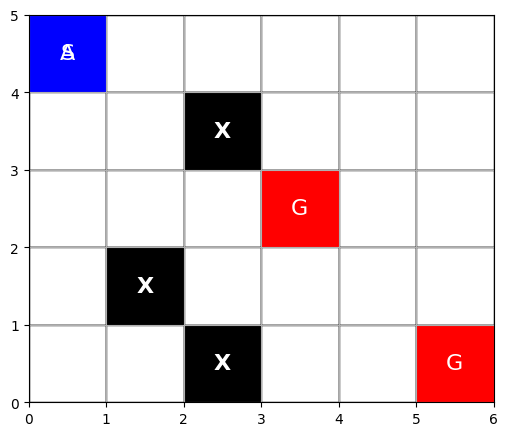

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

class GridWorld:
    def __init__(self,
                 size=(4,4),              # shape of grid (rows, cols)
                 start=(0,0),             # start position
                 goals=[(3,3)],           # list of goal positions
                 obstacles=[],            # list of obstacle positions
                 agent_color='green',     # agent color
                 goal_color='red',        # goal color
                 obstacle_color='gray'):  # obstacle color

        self.rows, self.cols = size
        self.start = start
        self.state = start
        self.goals = goals
        self.obstacles = obstacles
        self.agent_color = agent_color
        self.goal_color = goal_color
        self.obstacle_color = obstacle_color

    def reset(self):
        self.state = self.start
        return self.state

    def render(self):
        fig, ax = plt.subplots(figsize=(6,6))

        # Draw grid
        for i in range(self.rows):
            for j in range(self.cols):
                rect = patches.Rectangle((j, self.rows-1-i), 1, 1,
                                         linewidth=1, edgecolor='black', facecolor='white')
                ax.add_patch(rect)

        # Draw obstacles
        for (x, y) in self.obstacles:
            ax.add_patch(patches.Rectangle((y, self.rows-1-x), 1, 1, facecolor=self.obstacle_color))
            ax.text(y+0.5, self.rows-1-x+0.5, 'X', ha='center', va='center', color='white', fontsize=16, weight='bold')

        # Draw goals
        for (gx, gy) in self.goals:
            ax.add_patch(patches.Rectangle((gy, self.rows-1-gx), 1, 1, facecolor=self.goal_color))
            ax.text(gy+0.5, self.rows-1-gx+0.5, 'G', ha='center', va='center', color='white', fontsize=16)

        # Draw start
        sx, sy = self.start
        ax.add_patch(patches.Rectangle((sy, self.rows-1-sx), 1, 1, facecolor='orange'))
        ax.text(sy+0.5, self.rows-1-sx+0.5, 'S', ha='center', va='center', color='white', fontsize=16)

        # Draw agent
        ax.add_patch(patches.Rectangle((self.state[1], self.rows-1-self.state[0]), 1, 1, facecolor=self.agent_color))
        ax.text(self.state[1]+0.5, self.rows-1-self.state[0]+0.5, 'A', ha='center', va='center', color='white', fontsize=16)

        ax.set_xlim(0, self.cols)
        ax.set_ylim(0, self.rows)
        ax.set_xticks(range(self.cols+1))
        ax.set_yticks(range(self.rows+1))
        ax.set_aspect('equal')
        plt.grid(True)
        plt.show(block=False)
        plt.pause(1)
        plt.clf()


# Exemple d'utilisation
env = GridWorld(
    size=(5,6),
    start=(0,0),
    goals=[(4,5), (2,3)],
    obstacles=[(1,2), (3,1), (4,2)],
    agent_color='blue',
    goal_color='red',
    obstacle_color='black'
)

env.reset()
env.render()
plt.close()


# GridWorld + Neural Network Agent (Auto-learning)

Episode 100/1000 | Total reward: -1.03 | ε=0.61
Episode 200/1000 | Total reward: -1.18 | ε=0.37
Episode 300/1000 | Total reward: -3.21 | ε=0.22
Episode 400/1000 | Total reward: -1.12 | ε=0.13
Episode 500/1000 | Total reward: -1.03 | ε=0.08
Episode 600/1000 | Total reward: -2.09 | ε=0.05
Episode 700/1000 | Total reward: -1.95 | ε=0.05
Episode 800/1000 | Total reward: -3.60 | ε=0.05
Episode 900/1000 | Total reward: -8.83 | ε=0.05
Episode 1000/1000 | Total reward: -2.45 | ε=0.05
✅ Training finished!


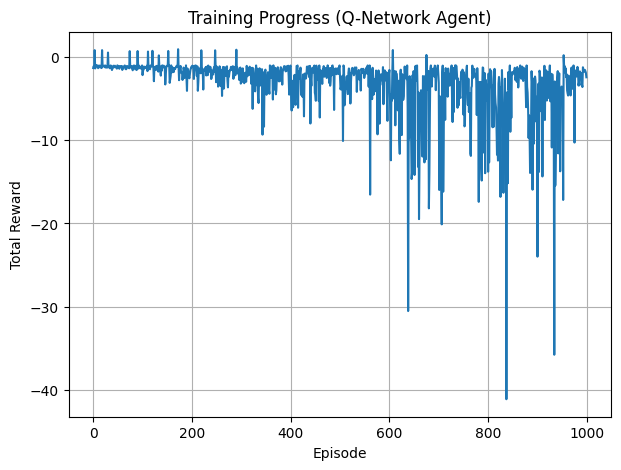


🎬 Visualizing learned behavior...


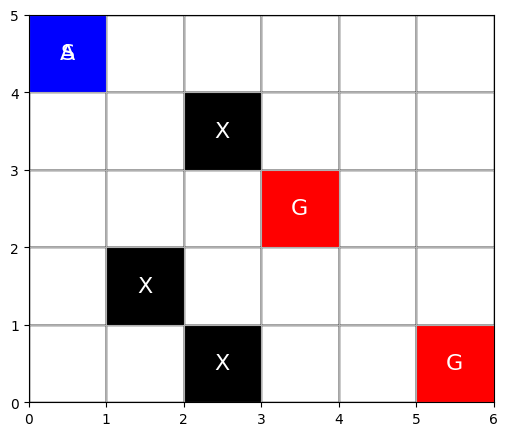

<Figure size 640x480 with 0 Axes>

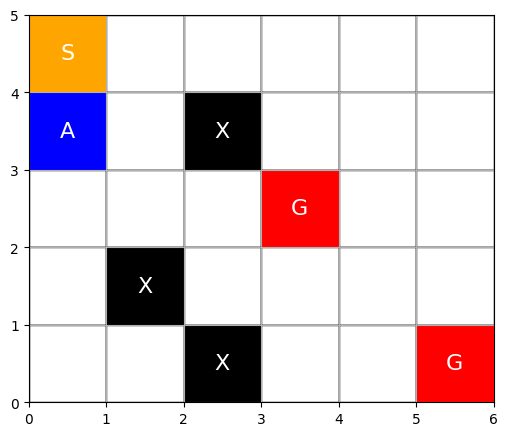

<Figure size 640x480 with 0 Axes>

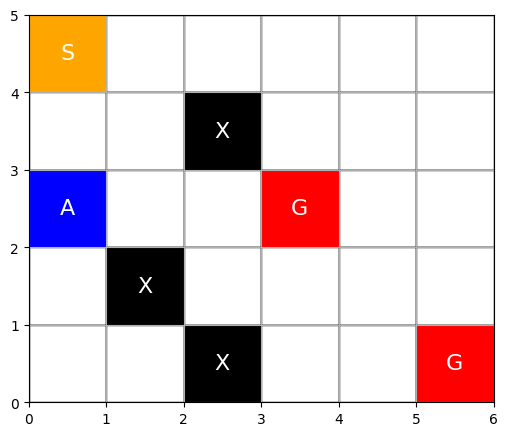

<Figure size 640x480 with 0 Axes>

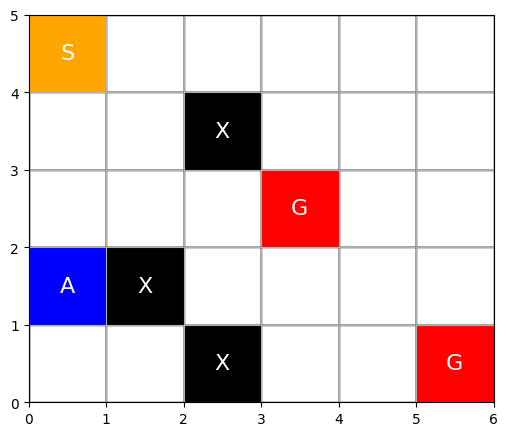

<Figure size 640x480 with 0 Axes>

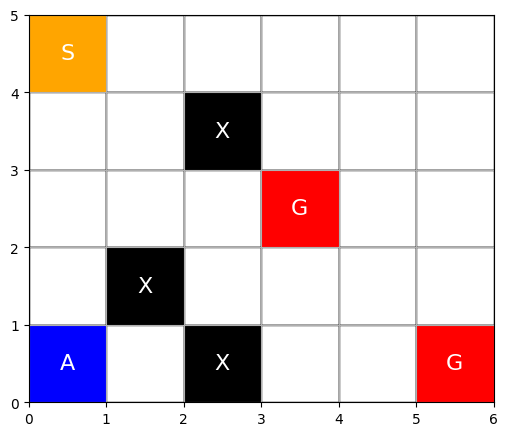

<Figure size 640x480 with 0 Axes>

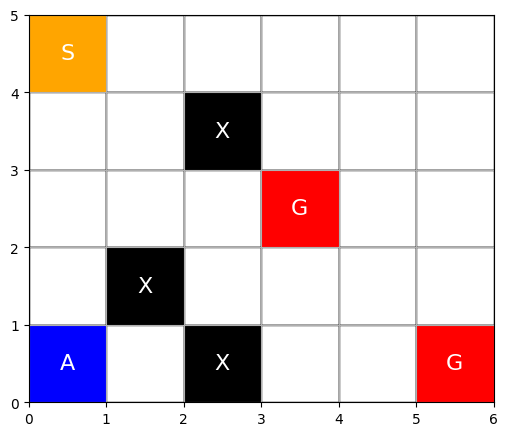

<Figure size 640x480 with 0 Axes>

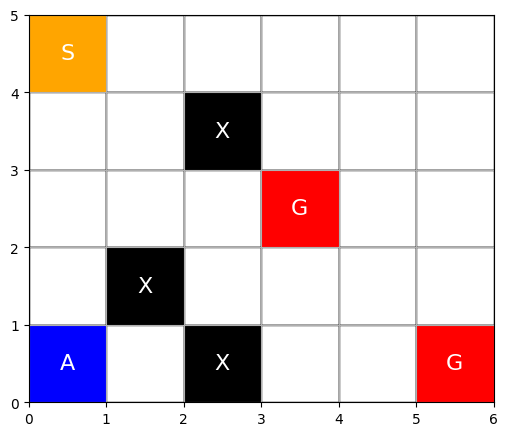

<Figure size 640x480 with 0 Axes>

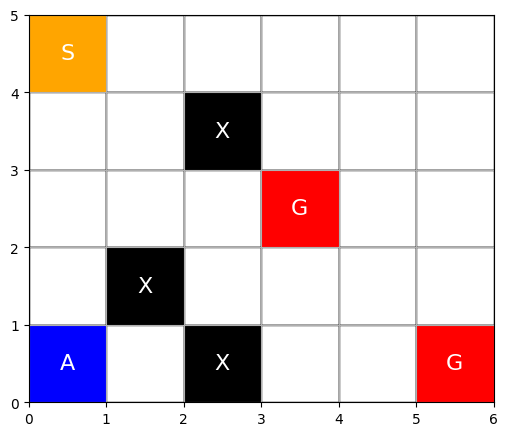

<Figure size 640x480 with 0 Axes>

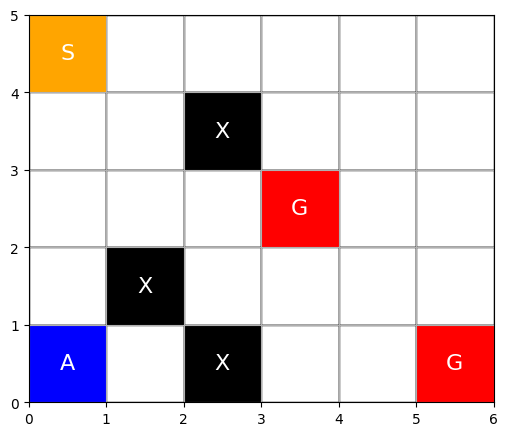

<Figure size 640x480 with 0 Axes>

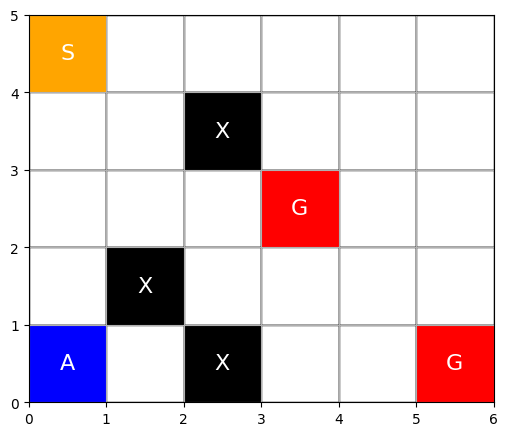

<Figure size 640x480 with 0 Axes>

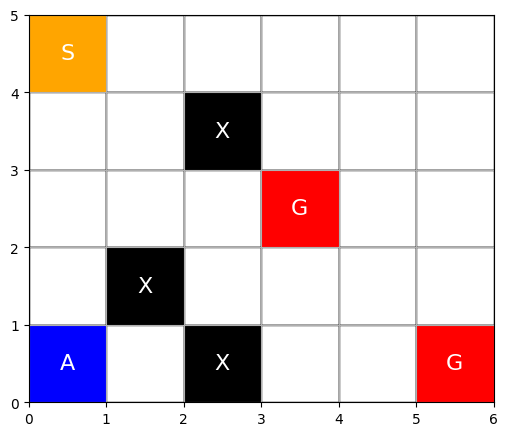

<Figure size 640x480 with 0 Axes>

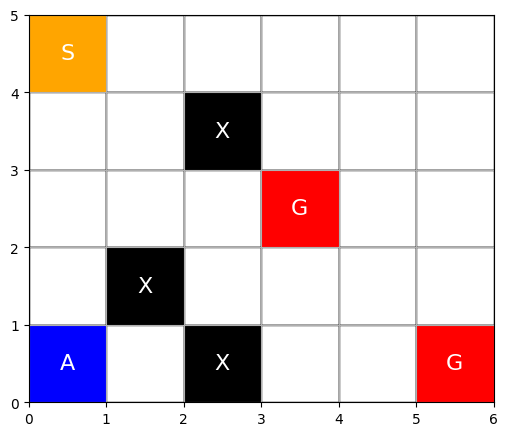

<Figure size 640x480 with 0 Axes>

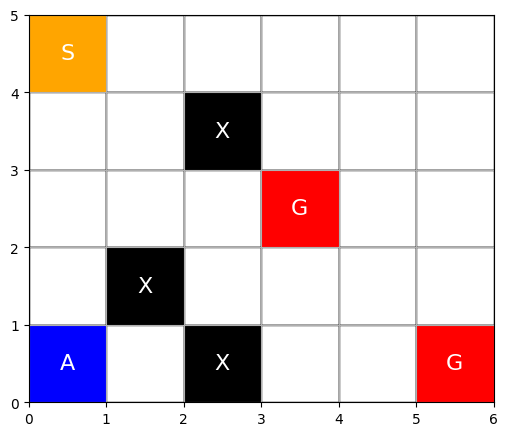

<Figure size 640x480 with 0 Axes>

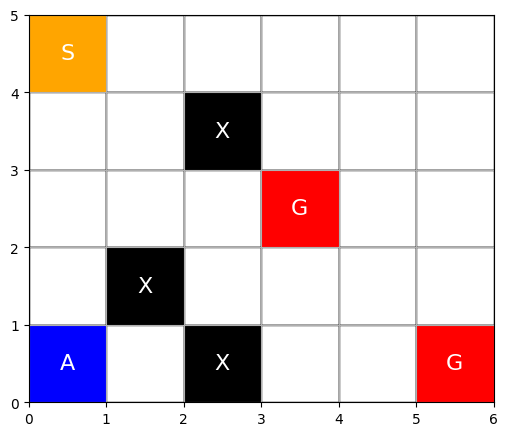

<Figure size 640x480 with 0 Axes>

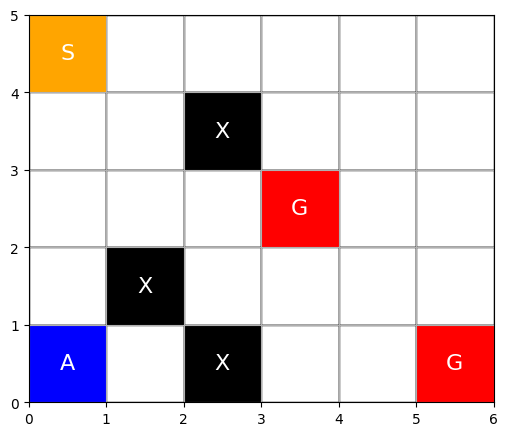

<Figure size 640x480 with 0 Axes>

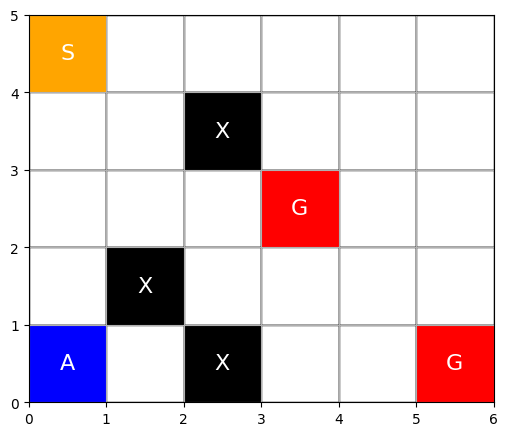

<Figure size 640x480 with 0 Axes>

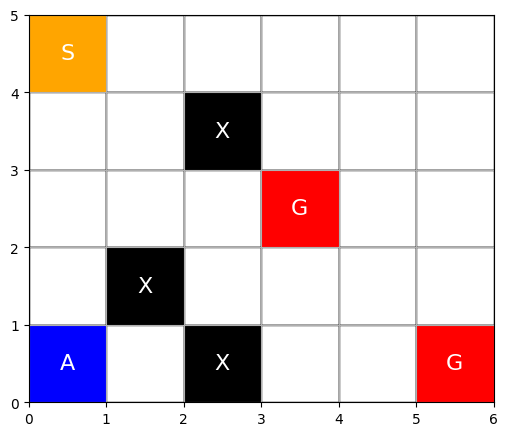

<Figure size 640x480 with 0 Axes>

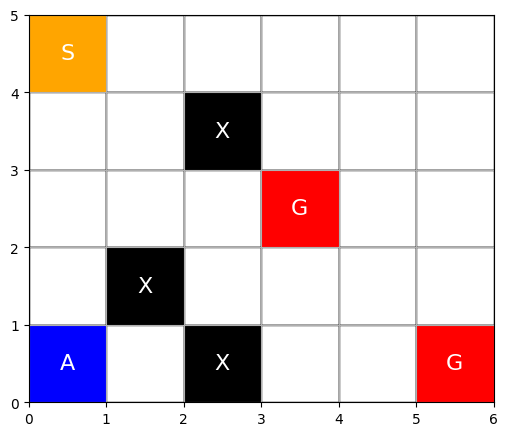

<Figure size 640x480 with 0 Axes>

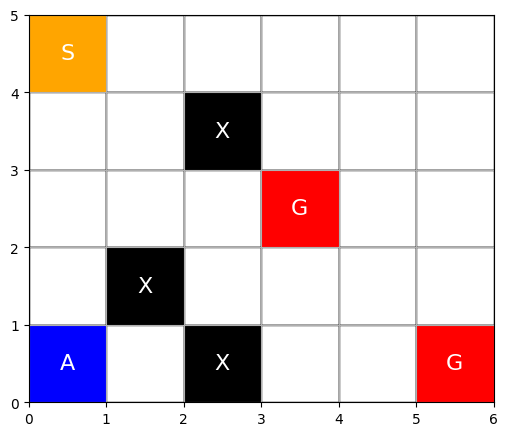

<Figure size 640x480 with 0 Axes>

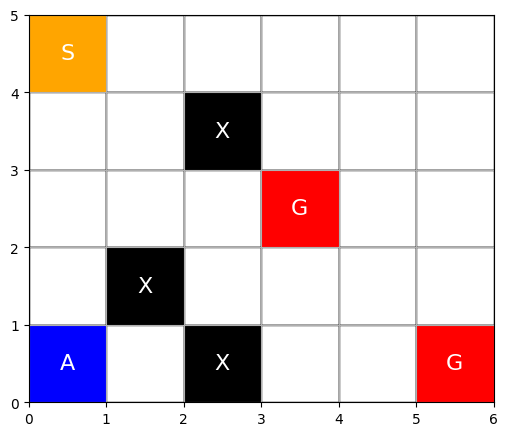

<Figure size 640x480 with 0 Axes>

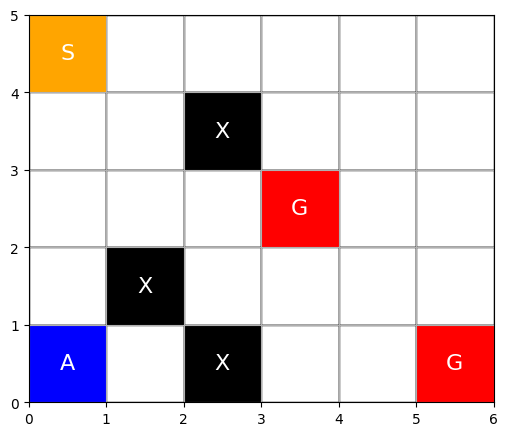

<Figure size 640x480 with 0 Axes>

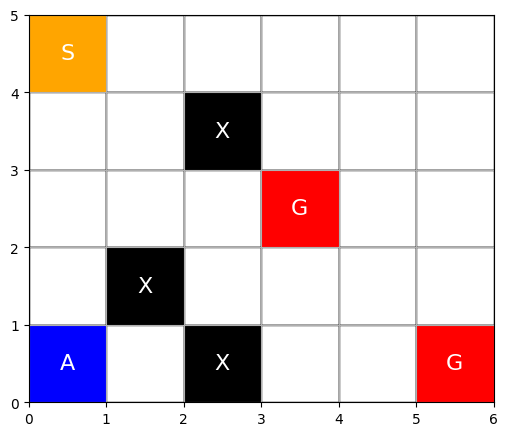

<Figure size 640x480 with 0 Axes>

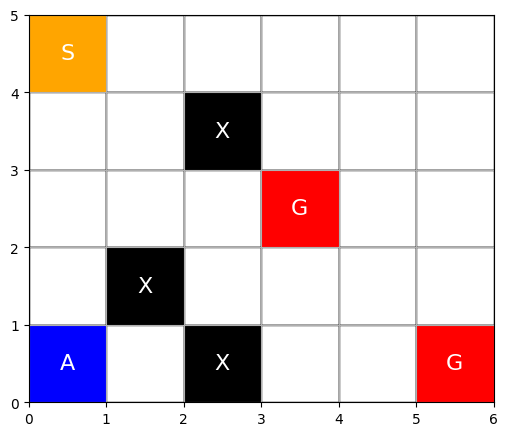

<Figure size 640x480 with 0 Axes>

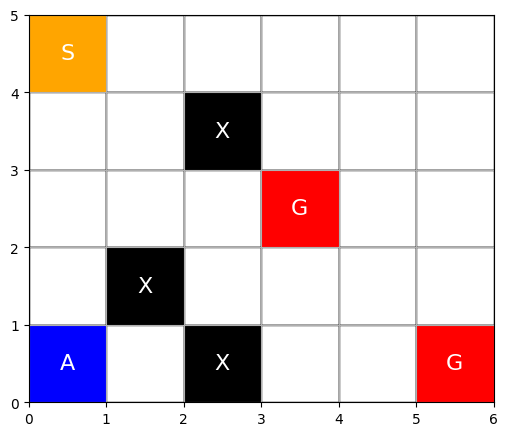

<Figure size 640x480 with 0 Axes>

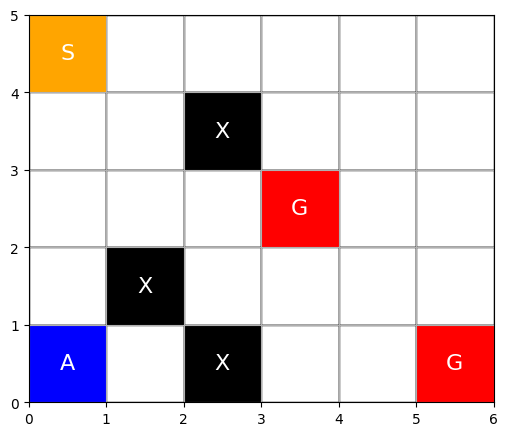

<Figure size 640x480 with 0 Axes>

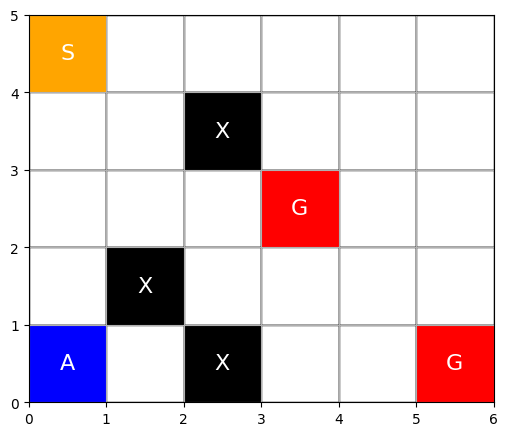

<Figure size 640x480 with 0 Axes>

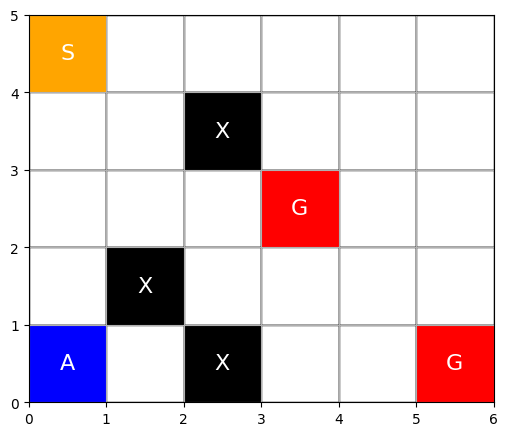

<Figure size 640x480 with 0 Axes>

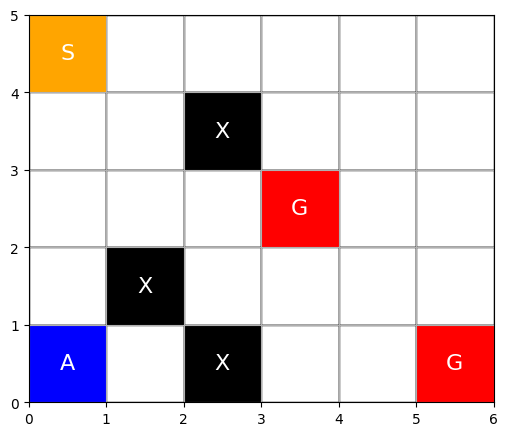

<Figure size 640x480 with 0 Axes>

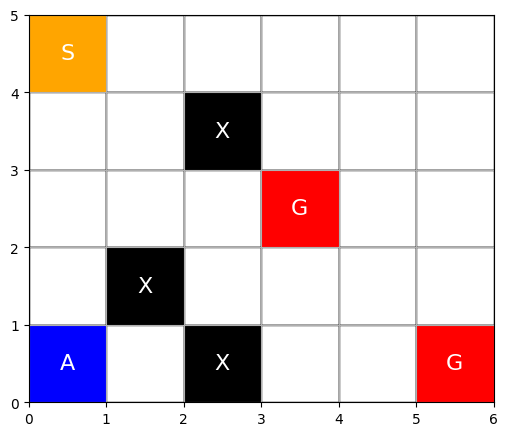

<Figure size 640x480 with 0 Axes>

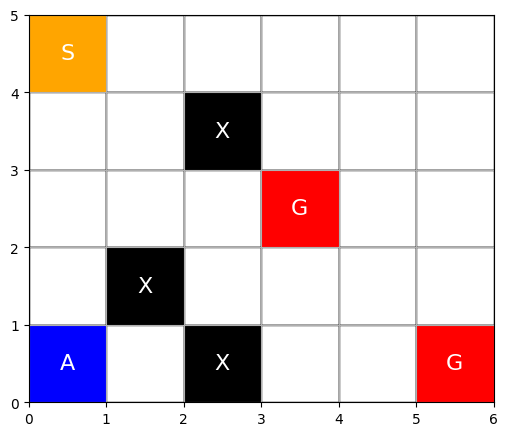

<Figure size 640x480 with 0 Axes>

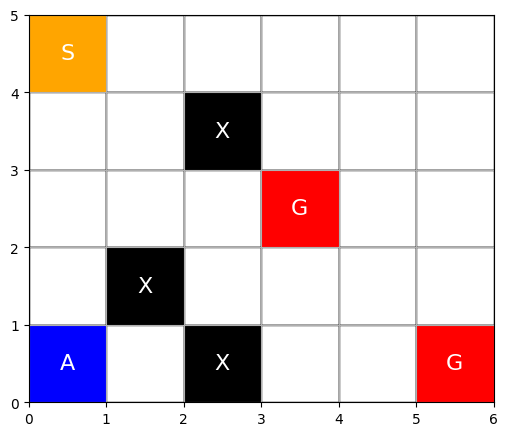

🎯 Finished visualization.


In [8]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# =====================
#   GridWorld Environment
# =====================
class GridWorld:
    def __init__(self,
                 size=(5,6),
                 start=(0,0),
                 goals=[(4,5)],
                 obstacles=[],
                 agent_color='blue',
                 goal_color='red',
                 obstacle_color='black'):

        self.rows, self.cols = size
        self.start = start
        self.state = start
        self.goals = goals
        self.obstacles = obstacles
        self.agent_color = agent_color
        self.goal_color = goal_color
        self.obstacle_color = obstacle_color
        self.actions = ['up', 'down', 'left', 'right']

    def reset(self):
        self.state = self.start
        return np.array(self.state, dtype=np.float32)

    def step(self, action):
        x, y = self.state
        if action == 'up' and x > 0: x -= 1
        elif action == 'down' and x < self.rows - 1: x += 1
        elif action == 'left' and y > 0: y -= 1
        elif action == 'right' and y < self.cols - 1: y += 1

        new_state = (x, y)

        # Check for obstacles or goals
        if new_state in self.obstacles:
            reward = -1.0
            done = True
        elif new_state in self.goals:
            reward = 1.0
            done = True
        else:
            reward = -0.01
            done = False

        self.state = new_state
        return np.array(self.state, dtype=np.float32), reward, done

    def render(self):
        fig, ax = plt.subplots(figsize=(6,6))

        for i in range(self.rows):
            for j in range(self.cols):
                rect = patches.Rectangle((j, self.rows-1-i), 1, 1,
                                         linewidth=1, edgecolor='black', facecolor='white')
                ax.add_patch(rect)

        for (x, y) in self.obstacles:
            ax.add_patch(patches.Rectangle((y, self.rows-1-x), 1, 1, facecolor=self.obstacle_color))
            ax.text(y+0.5, self.rows-1-x+0.5, 'X', ha='center', va='center', color='white', fontsize=16)

        for (gx, gy) in self.goals:
            ax.add_patch(patches.Rectangle((gy, self.rows-1-gx), 1, 1, facecolor=self.goal_color))
            ax.text(gy+0.5, self.rows-1-gx+0.5, 'G', ha='center', va='center', color='white', fontsize=16)

        sx, sy = self.start
        ax.add_patch(patches.Rectangle((sy, self.rows-1-sx), 1, 1, facecolor='orange'))
        ax.text(sy+0.5, self.rows-1-sx+0.5, 'S', ha='center', va='center', color='white', fontsize=16)

        ax.add_patch(patches.Rectangle((self.state[1], self.rows-1-self.state[0]), 1, 1, facecolor=self.agent_color))
        ax.text(self.state[1]+0.5, self.rows-1-self.state[0]+0.5, 'A', ha='center', va='center', color='white', fontsize=16)

        ax.set_xlim(0, self.cols)
        ax.set_ylim(0, self.rows)
        ax.set_xticks(range(self.cols+1))
        ax.set_yticks(range(self.rows+1))
        ax.set_aspect('equal')
        plt.grid(True)
        plt.show(block=False)
        plt.pause(0.4)
        plt.clf()

# =====================
#   Neural Network Q-Approximator
# =====================
class QNetwork(nn.Module):
    def __init__(self, input_dim=2, output_dim=4):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, output_dim)
        )
    def forward(self, x):
        return self.net(x)

# =====================
#   Training setup
# =====================
env = GridWorld(
    size=(5,6),
    start=(0,0),
    goals=[(4,5), (2,3)],
    obstacles=[(1,2), (3,1), (4,2)]
)

model = QNetwork()
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

gamma = 0.9
epsilon = 1.0
epsilon_min = 0.05
epsilon_decay = 0.995
episodes = 1000

rewards_per_episode = []

# =====================
#   Training loop
# =====================
for ep in range(episodes):
    state = env.reset() / np.array([env.rows-1, env.cols-1])
    done = False
    total_reward = 0

    while not done:
        state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
        q_values = model(state_tensor)

        if random.random() < epsilon:
            action_idx = random.randint(0, 3)
        else:
            action_idx = torch.argmax(q_values).item()

        action = env.actions[action_idx]
        next_state, reward, done = env.step(action)
        next_state = next_state / np.array([env.rows-1, env.cols-1])

        next_q_values = model(torch.tensor(next_state, dtype=torch.float32).unsqueeze(0)).detach()
        target = q_values.clone()
        target[0, action_idx] = reward + gamma * torch.max(next_q_values) * (1 - int(done))

        loss = criterion(q_values, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        state = next_state
        total_reward += reward

    epsilon = max(epsilon * epsilon_decay, epsilon_min)
    rewards_per_episode.append(total_reward)

    if (ep+1) % 100 == 0:
        print(f"Episode {ep+1}/{episodes} | Total reward: {total_reward:.2f} | ε={epsilon:.2f}")

print("✅ Training finished!")

# =====================
#   Plot training curve
# =====================
plt.figure(figsize=(7,5))
plt.plot(rewards_per_episode)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Training Progress (Q-Network Agent)")
plt.grid(True)
plt.show()

# =====================
#   Test with Visualization
# =====================
state = env.reset() / np.array([env.rows-1, env.cols-1])
done = False
steps = 0

print("\n🎬 Visualizing learned behavior...")

while not done and steps < 30:
    env.render()
    state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
    with torch.no_grad():
        q_values = model(state_tensor)
        action_idx = torch.argmax(q_values).item()
    next_state, reward, done = env.step(env.actions[action_idx])
    state = next_state / np.array([env.rows-1, env.cols-1])
    steps += 1

env.render()
plt.close()
print("🎯 Finished visualization.")


# Actor–Critic (Policy + Value Function) sur GridWorld avancee pour comparee

In [11]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# =====================
#   GridWorld Environment
# =====================
class GridWorld:
    def __init__(self,
                 size=(5,6),
                 start=(0,0),
                 goals=[(4,5)],
                 obstacles=[],
                 agent_color='blue',
                 goal_color='red',
                 obstacle_color='black'):

        self.rows, self.cols = size
        self.start = start
        self.state = start
        self.goals = goals
        self.obstacles = obstacles
        self.agent_color = agent_color
        self.goal_color = goal_color
        self.obstacle_color = obstacle_color
        self.actions = ['up', 'down', 'left', 'right']

    def reset(self):
        self.state = self.start
        return np.array(self.state, dtype=np.float32)

    def step(self, action):
        x, y = self.state
        if action == 'up' and x > 0: x -= 1
        elif action == 'down' and x < self.rows - 1: x += 1
        elif action == 'left' and y > 0: y -= 1
        elif action == 'right' and y < self.cols - 1: y += 1

        new_state = (x, y)

        # Check for obstacles or goals
        if new_state in self.obstacles:
            reward = -1.0
            done = True
        elif new_state in self.goals:
            reward = 1.0
            done = True
        else:
            reward = -0.01
            done = False

        self.state = new_state
        return np.array(self.state, dtype=np.float32), reward, done

    def render(self):
        fig, ax = plt.subplots(figsize=(6,6))
        for i in range(self.rows):
            for j in range(self.cols):
                rect = patches.Rectangle((j, self.rows-1-i), 1, 1,
                                         linewidth=1, edgecolor='black', facecolor='white')
                ax.add_patch(rect)

        for (x, y) in self.obstacles:
            ax.add_patch(patches.Rectangle((y, self.rows-1-x), 1, 1, facecolor=self.obstacle_color))
            ax.text(y+0.5, self.rows-1-x+0.5, 'X', ha='center', va='center', color='white', fontsize=16)

        for (gx, gy) in self.goals:
            ax.add_patch(patches.Rectangle((gy, self.rows-1-gx), 1, 1, facecolor=self.goal_color))
            ax.text(gy+0.5, self.rows-1-gx+0.5, 'G', ha='center', va='center', color='white', fontsize=16)

        sx, sy = self.start
        ax.add_patch(patches.Rectangle((sy, self.rows-1-sx), 1, 1, facecolor='orange'))
        ax.text(sy+0.5, self.rows-1-sx+0.5, 'S', ha='center', va='center', color='white', fontsize=16)

        ax.add_patch(patches.Rectangle((self.state[1], self.rows-1-self.state[0]), 1, 1, facecolor=self.agent_color))
        ax.text(self.state[1]+0.5, self.rows-1-self.state[0]+0.5, 'A', ha='center', va='center', color='white', fontsize=16)

        ax.set_xlim(0, self.cols)
        ax.set_ylim(0, self.rows)
        ax.set_xticks(range(self.cols+1))
        ax.set_yticks(range(self.rows+1))
        ax.set_aspect('equal')
        plt.grid(True)
        plt.show(block=False)
        plt.pause(0.3)
        plt.clf()


# =====================
#   Actor-Critic Network
# =====================
class ActorCritic(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=64, output_dim=4):
        super().__init__()
        self.shared = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU()
        )
        self.policy = nn.Sequential(
            nn.Linear(hidden_dim, output_dim),
            nn.Softmax(dim=-1)
        )
        self.value = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        shared_out = self.shared(x)
        probs = self.policy(shared_out)
        value = self.value(shared_out)
        return probs, value


# =====================
#   Training
# =====================
env = GridWorld(
    size=(5,6),
    start=(0,0),
    goals=[(4,5)],
    obstacles=[(1,2), (3,1), (4,2)]
)

model = ActorCritic()
optimizer = optim.Adam(model.parameters(), lr=0.01)
gamma = 0.9
episodes = 1000

rewards_per_episode = []

for ep in range(episodes):
    state = env.reset() / np.array([env.rows-1, env.cols-1])
    done = False
    total_reward = 0

    while not done:
        state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
        probs, value = model(state_tensor)

        dist = torch.distributions.Categorical(probs)
        action_idx = dist.sample().item()
        action = env.actions[action_idx]

        next_state, reward, done = env.step(action)
        next_state = next_state / np.array([env.rows-1, env.cols-1])

        _, next_value = model(torch.tensor(next_state, dtype=torch.float32).unsqueeze(0))

        td_target = reward + gamma * next_value * (1 - int(done))
        td_error = td_target - value

        # Actor loss (policy gradient)
        actor_loss = -dist.log_prob(torch.tensor(action_idx)) * td_error.detach()
        # Critic loss (value estimation)
        critic_loss = td_error.pow(2)
        loss = actor_loss + critic_loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        state = next_state
        total_reward += reward

    rewards_per_episode.append(total_reward)

    if (ep+1) % 100 == 0:
        print(f"Episode {ep+1}/{episodes} | Total reward: {total_reward:.2f}")

print("✅ Training finished!")

# =====================
#   Plot training progress
# =====================
plt.figure(figsize=(7,5))
plt.plot(rewards_per_episode)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Actor-Critic Training Progress")
plt.grid(True)
plt.show()

# =====================
#   Visualization of Learned Policy
# =====================
state = env.reset() / np.array([env.rows-1, env.cols-1])
done = False
steps = 0
print("\n🎬 Visualizing learned behavior...")

while not done and steps < 30:
    env.render()
    state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
    with torch.no_grad():
        probs, _ = model(state_tensor)
    action_idx = torch.argmax(probs).item()
    next_state, reward, done = env.step(env.actions[action_idx])
    state = next_state / np.array([env.rows-1, env.cols-1])
    steps += 1

env.render()
plt.close()
print("🎯 Finished visualization.")


KeyboardInterrupt: 